# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

**Business Use Case**

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

**Project Description**

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

**About The Dataset**

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.


You are provided with following 2 files:

1. **train.csv** : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2. **test.csv** : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


**Dataset Attributes**

Here is the description of all the variables:
- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign

**Output variable (desired target):**

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the test data
df_test = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [3]:
# Reading the train data
df_train = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df_train.shape

(31647, 18)

In [5]:
df_test.shape

(13564, 17)

In [6]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [8]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [9]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [10]:
df_train.drop_duplicates()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [11]:
# Checking unique values

In [12]:
for column in df_train.columns:
    print('Name of column', column)
    print(df_train[column].value_counts())
    print('\n')

Name of column ID
ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


Name of column age
age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


Name of column job
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


Name of column marital
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


Name of column education
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


Name of column default
default
no     31062
yes      585
Name: c

In [13]:
# seperating numerical and categorical columns
numerical_col = []
categorical_col = []
for i in df_train.dtypes.index:
    if df_train.dtypes[i] != 'object':
        numerical_col.append(i)
for i in df_train.dtypes.index:
    if df_train.dtypes[i] == 'object':
        categorical_col.append(i)
print('Categorical Columns :', categorical_col)
print('Numerical Columns :', numerical_col)

Categorical Columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [14]:
df_train.index

RangeIndex(start=0, stop=31647, step=1)

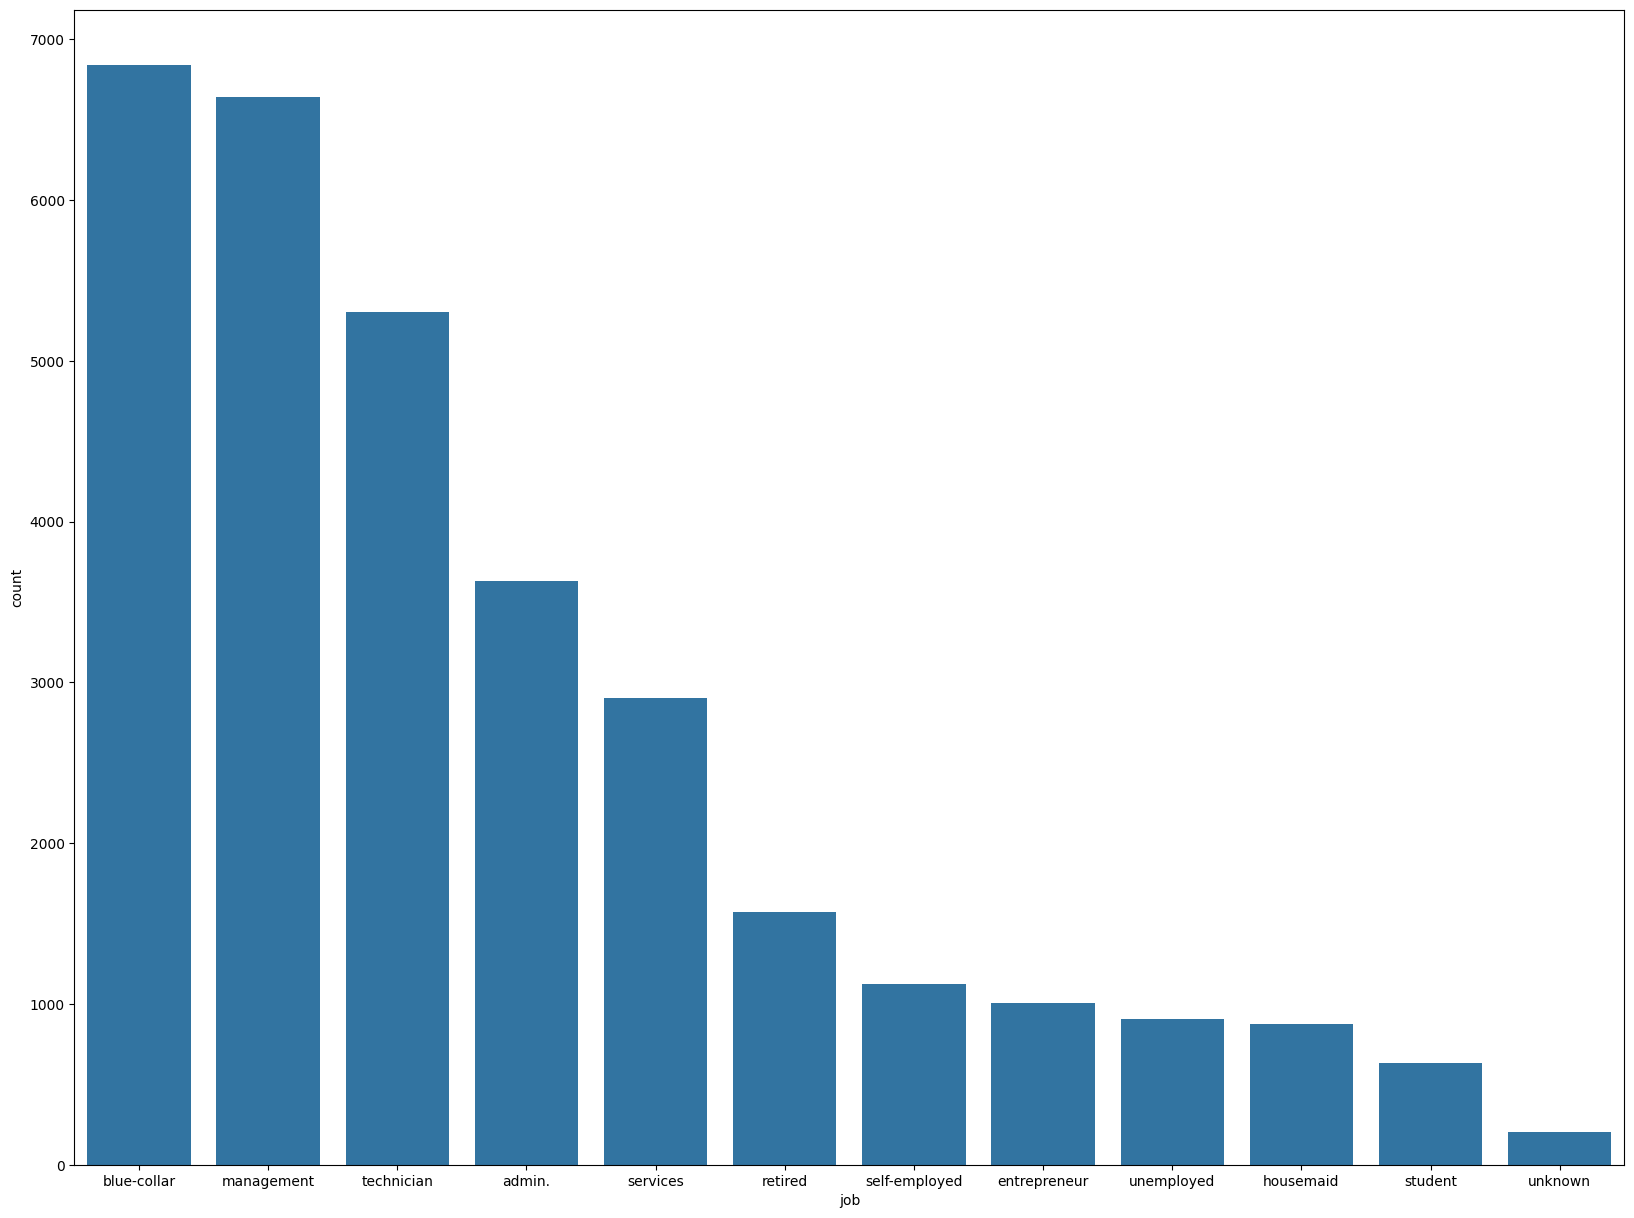

In [15]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.job.value_counts())
plt.show()

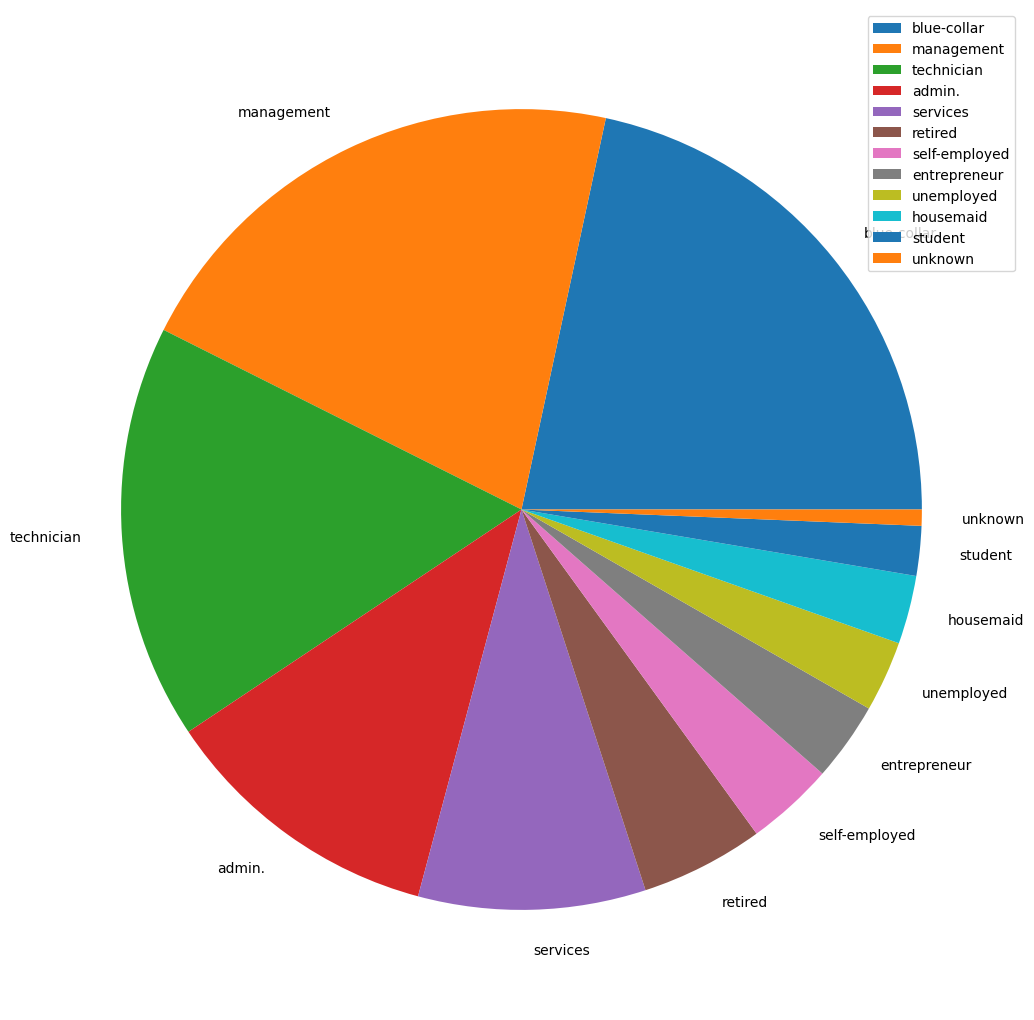

In [16]:
plt.figure(figsize = (20,13))
ax = df_train.job.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

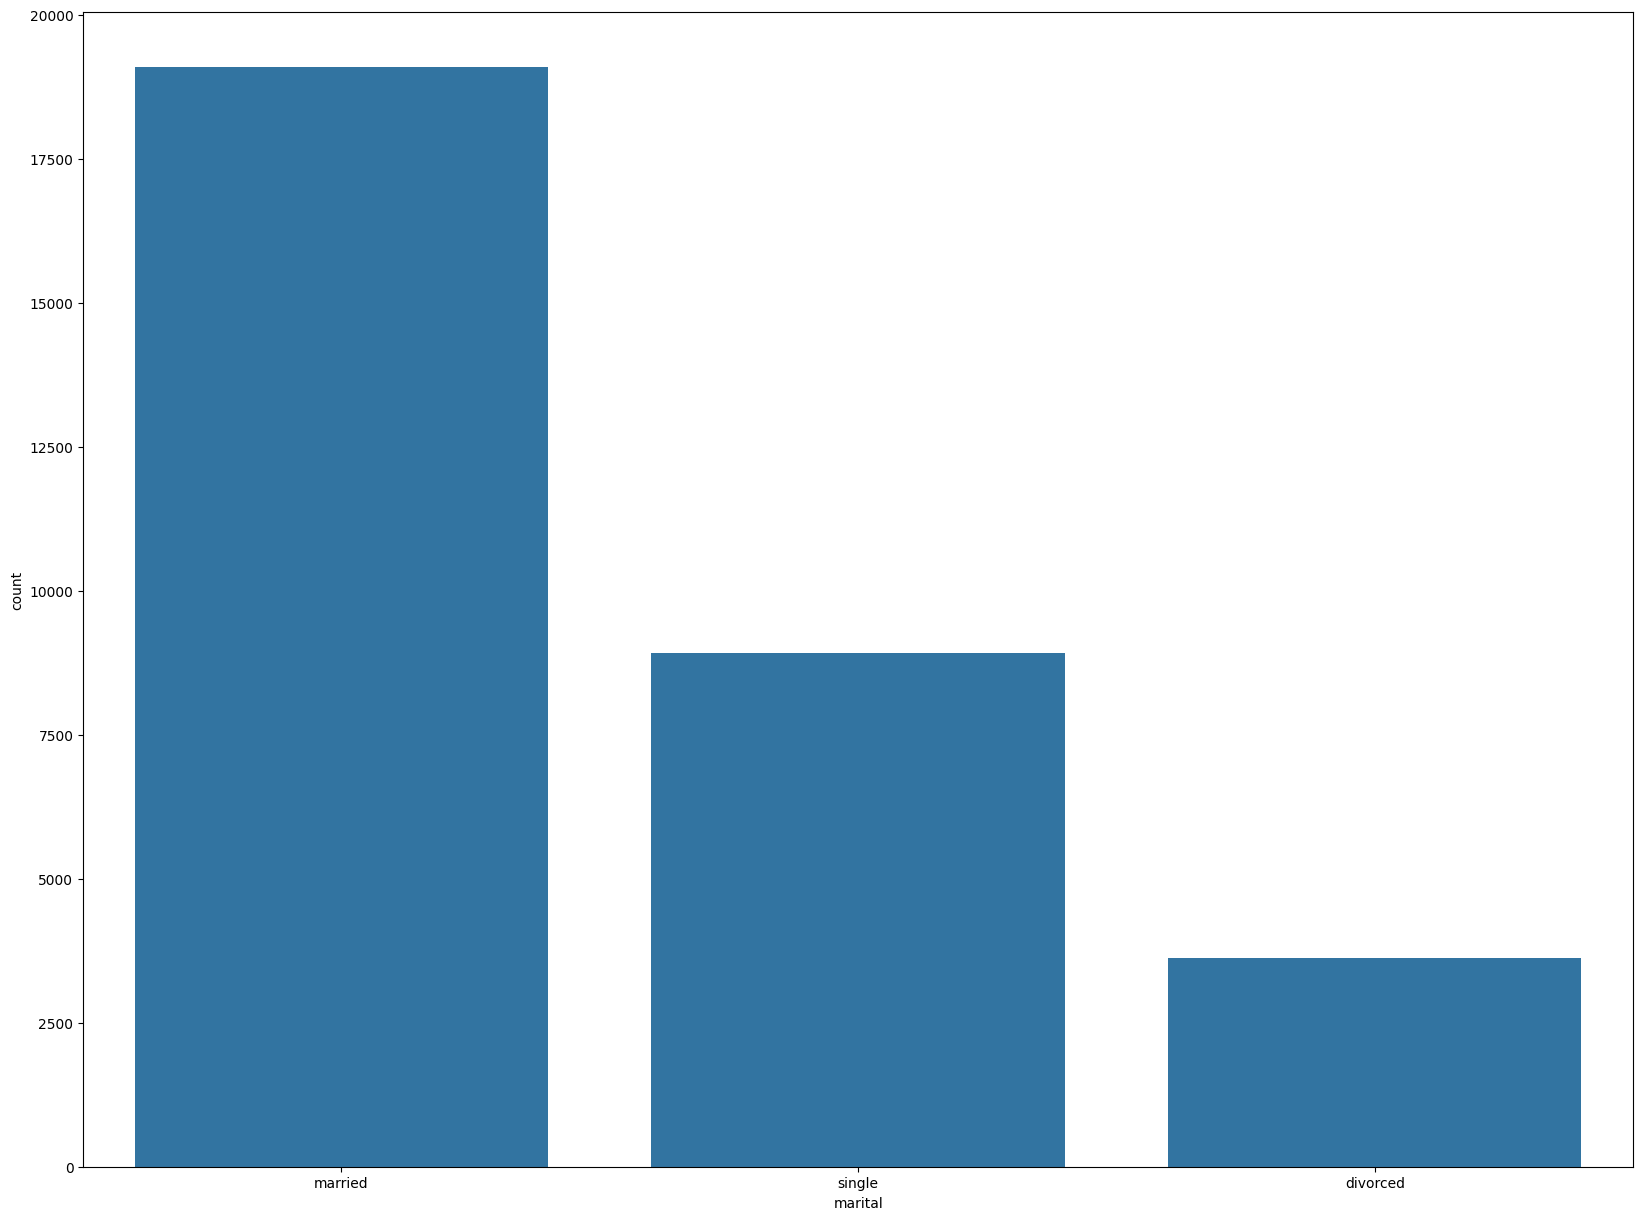

In [17]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.marital.value_counts())
plt.show()

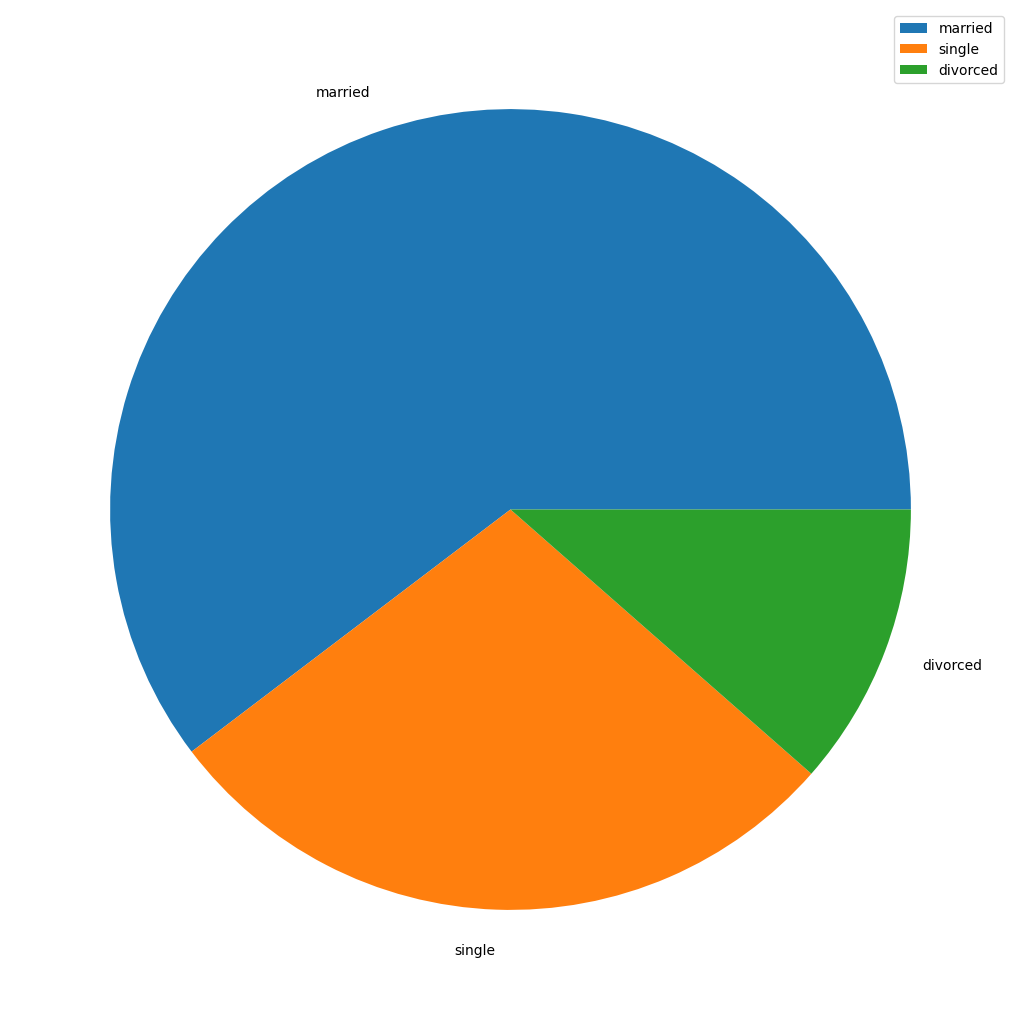

In [18]:
plt.figure(figsize = (20,13))
ax = df_train.marital.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

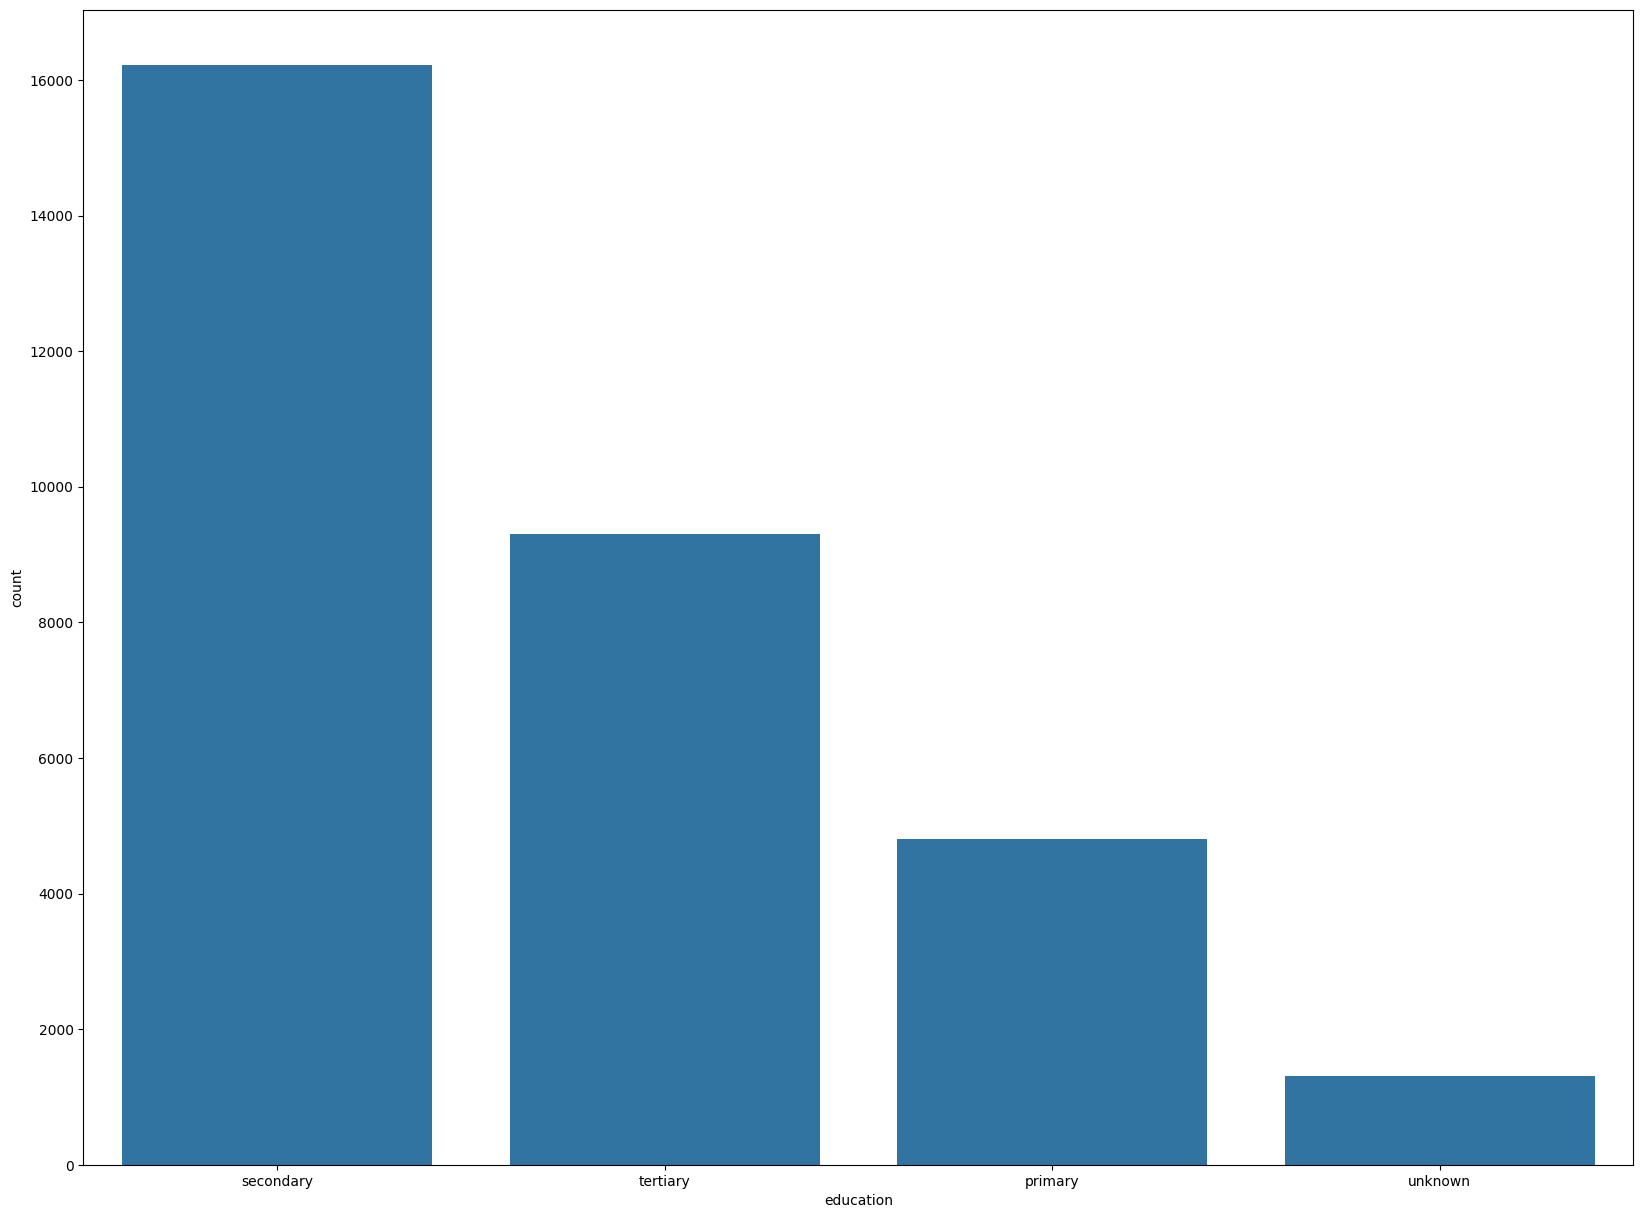

In [19]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.education.value_counts())
plt.show()

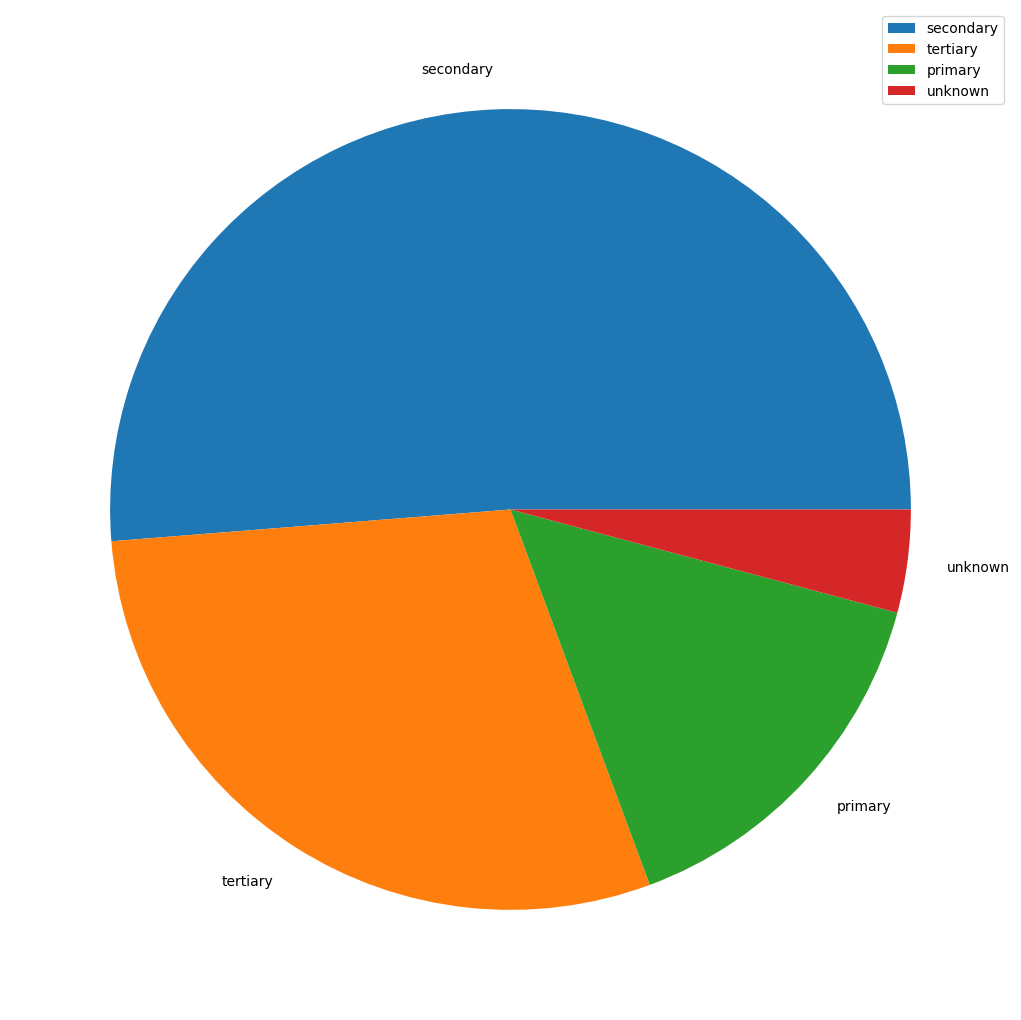

In [20]:
plt.figure(figsize = (20,13))
ax = df_train.education.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

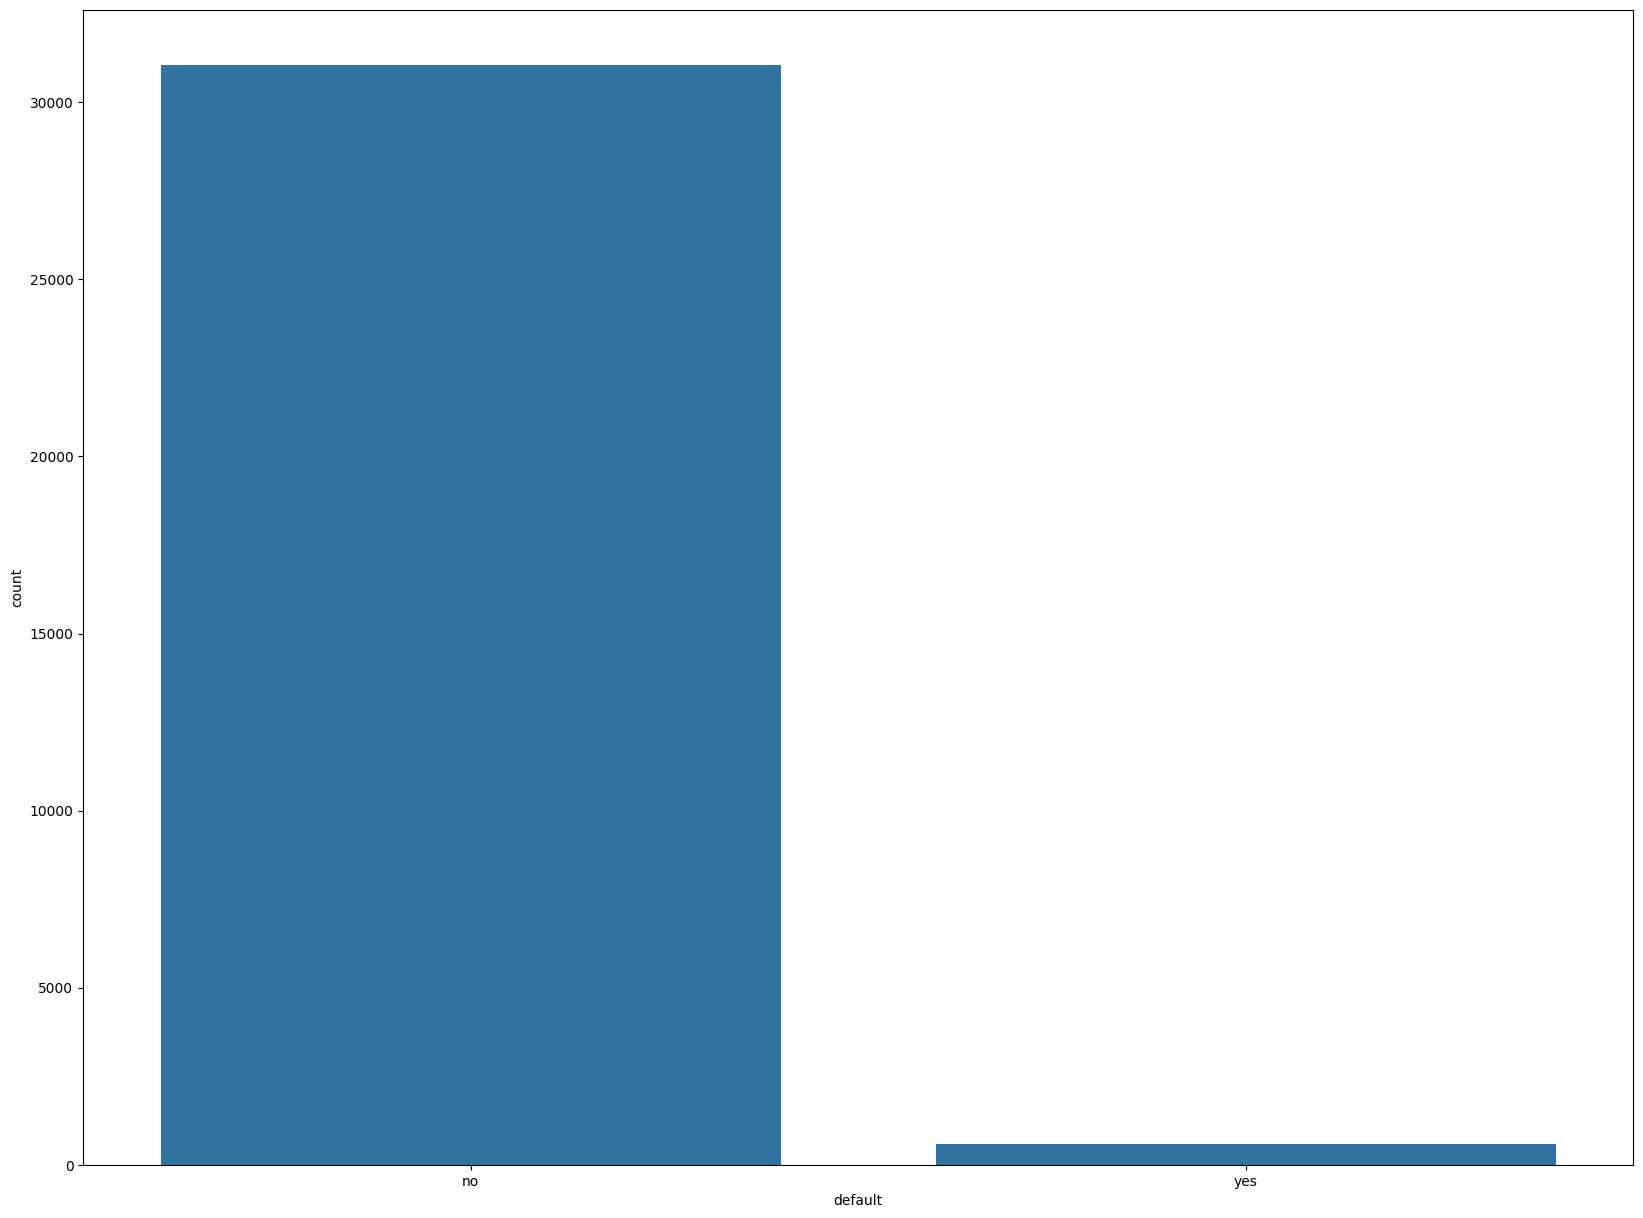

In [21]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.default.value_counts())
plt.show()

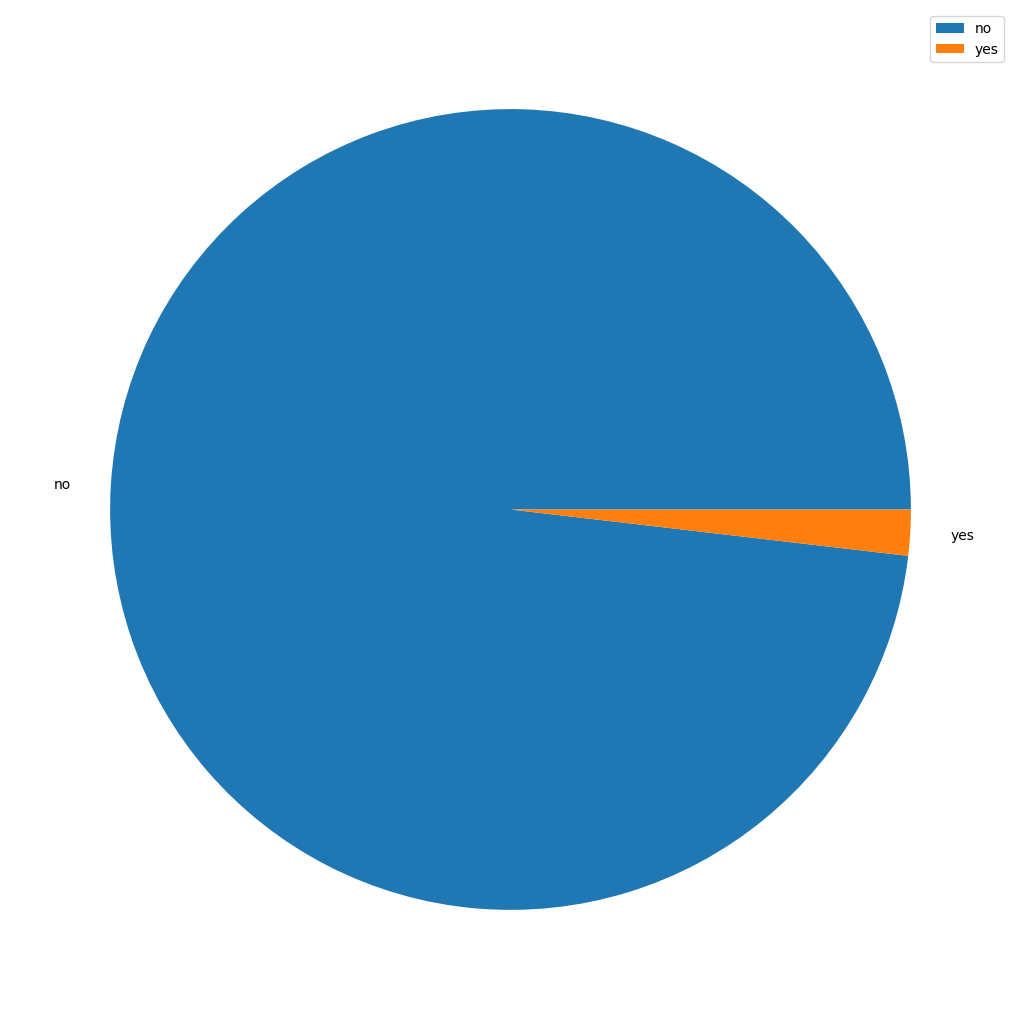

In [22]:
plt.figure(figsize = (20,13))
ax = df_train.default.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

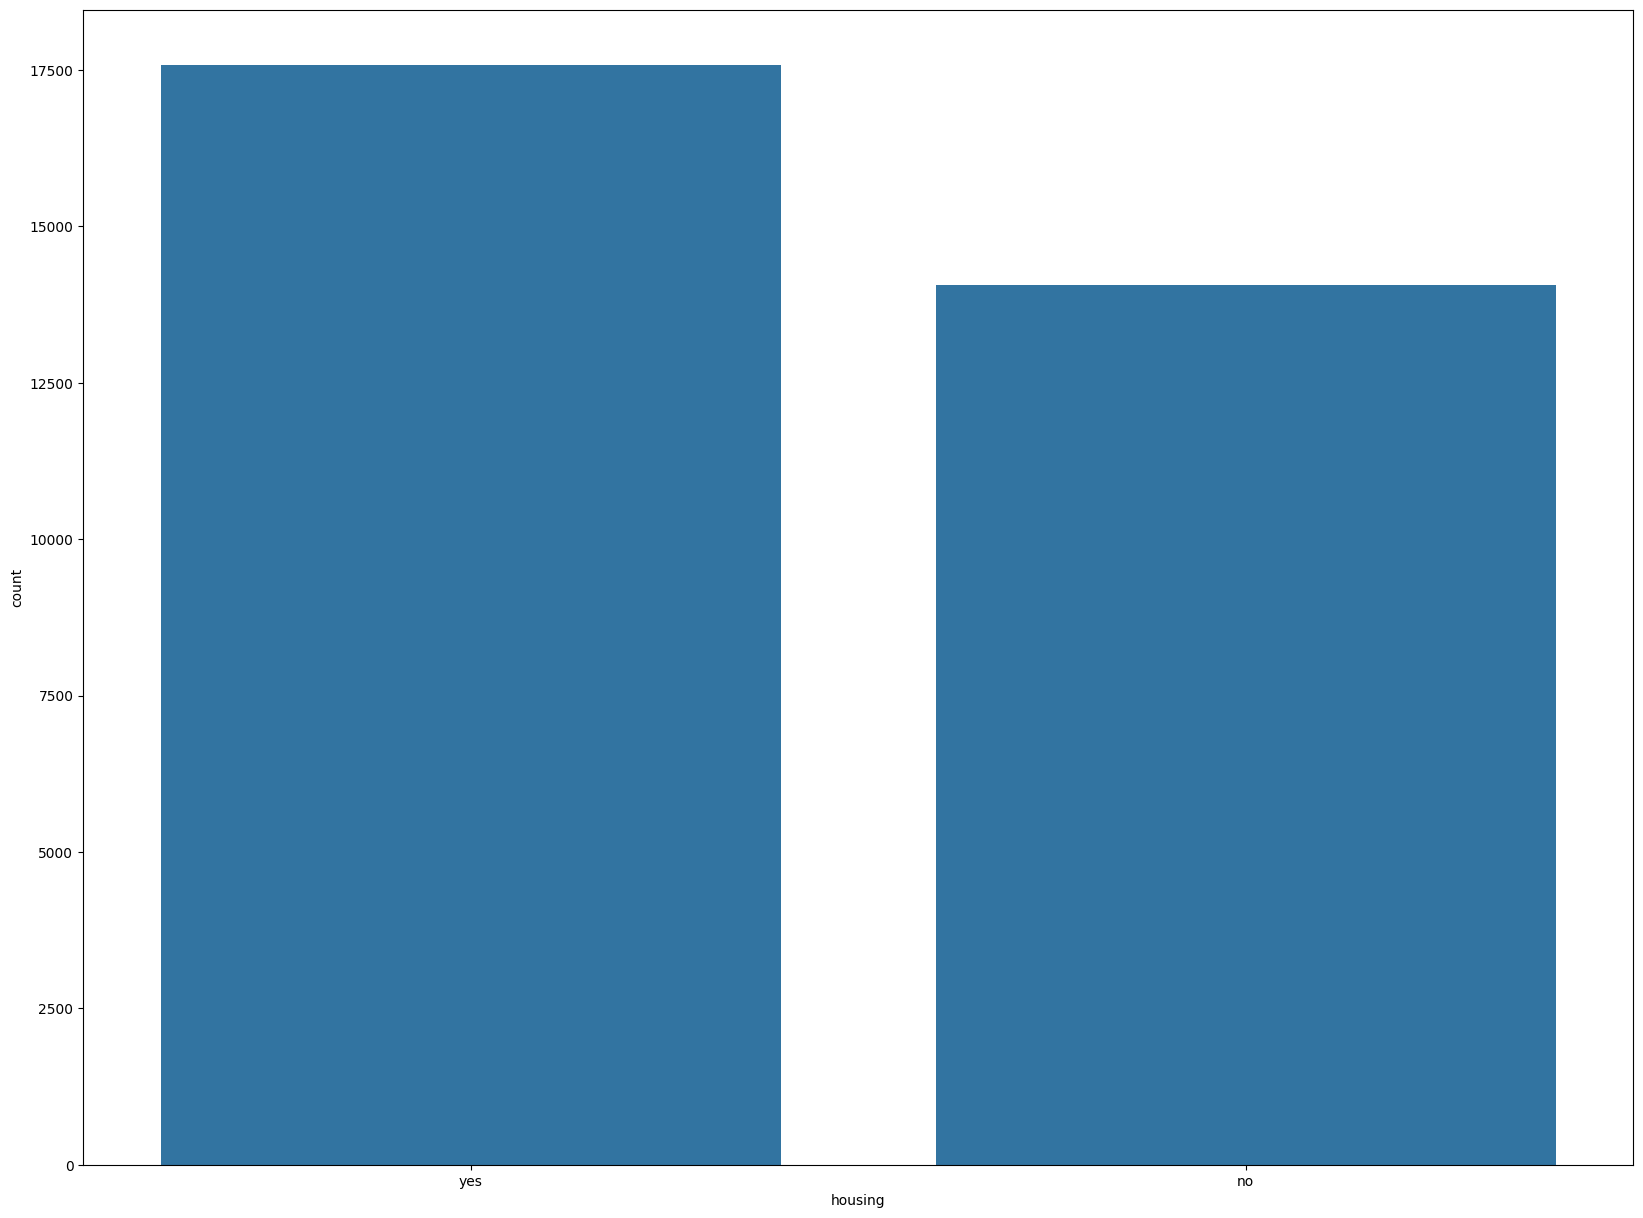

In [23]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.housing.value_counts())
plt.show()

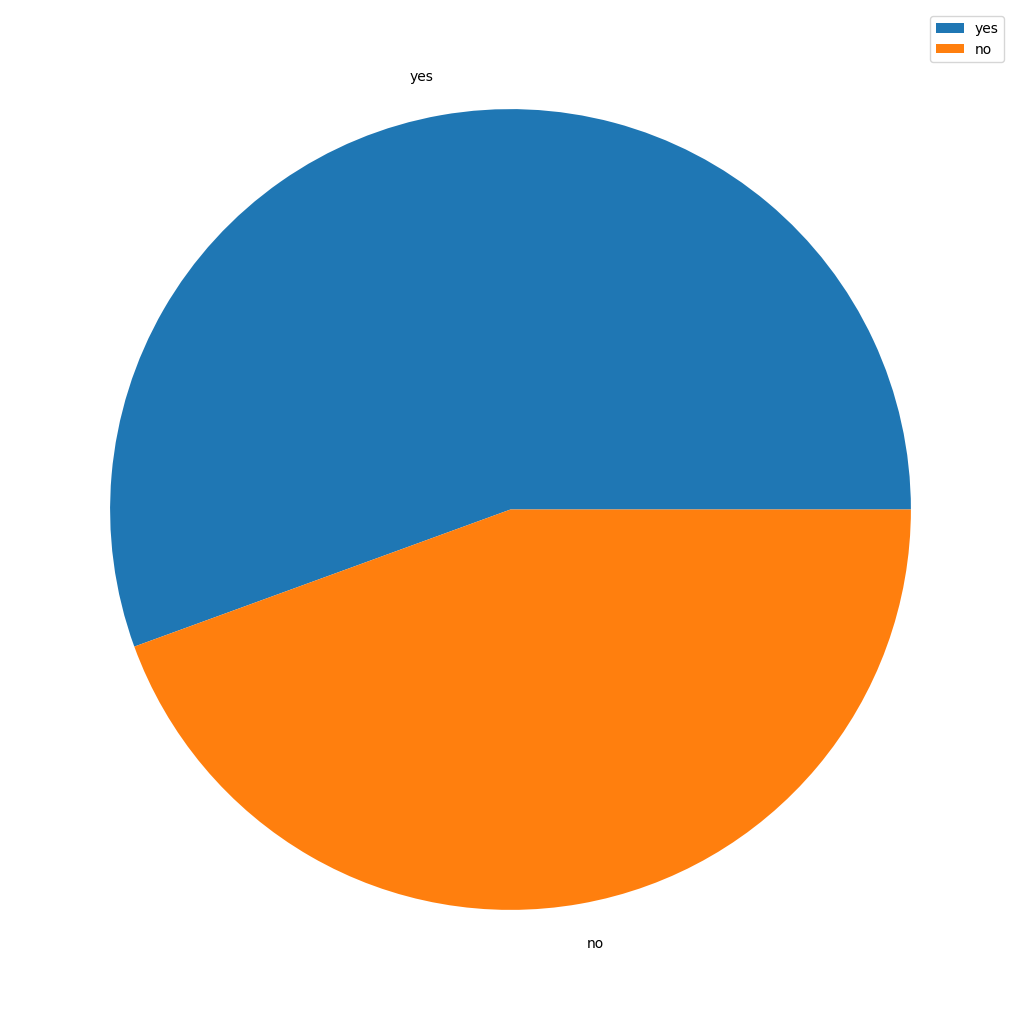

In [24]:
plt.figure(figsize = (20,13))
ax = df_train.housing.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

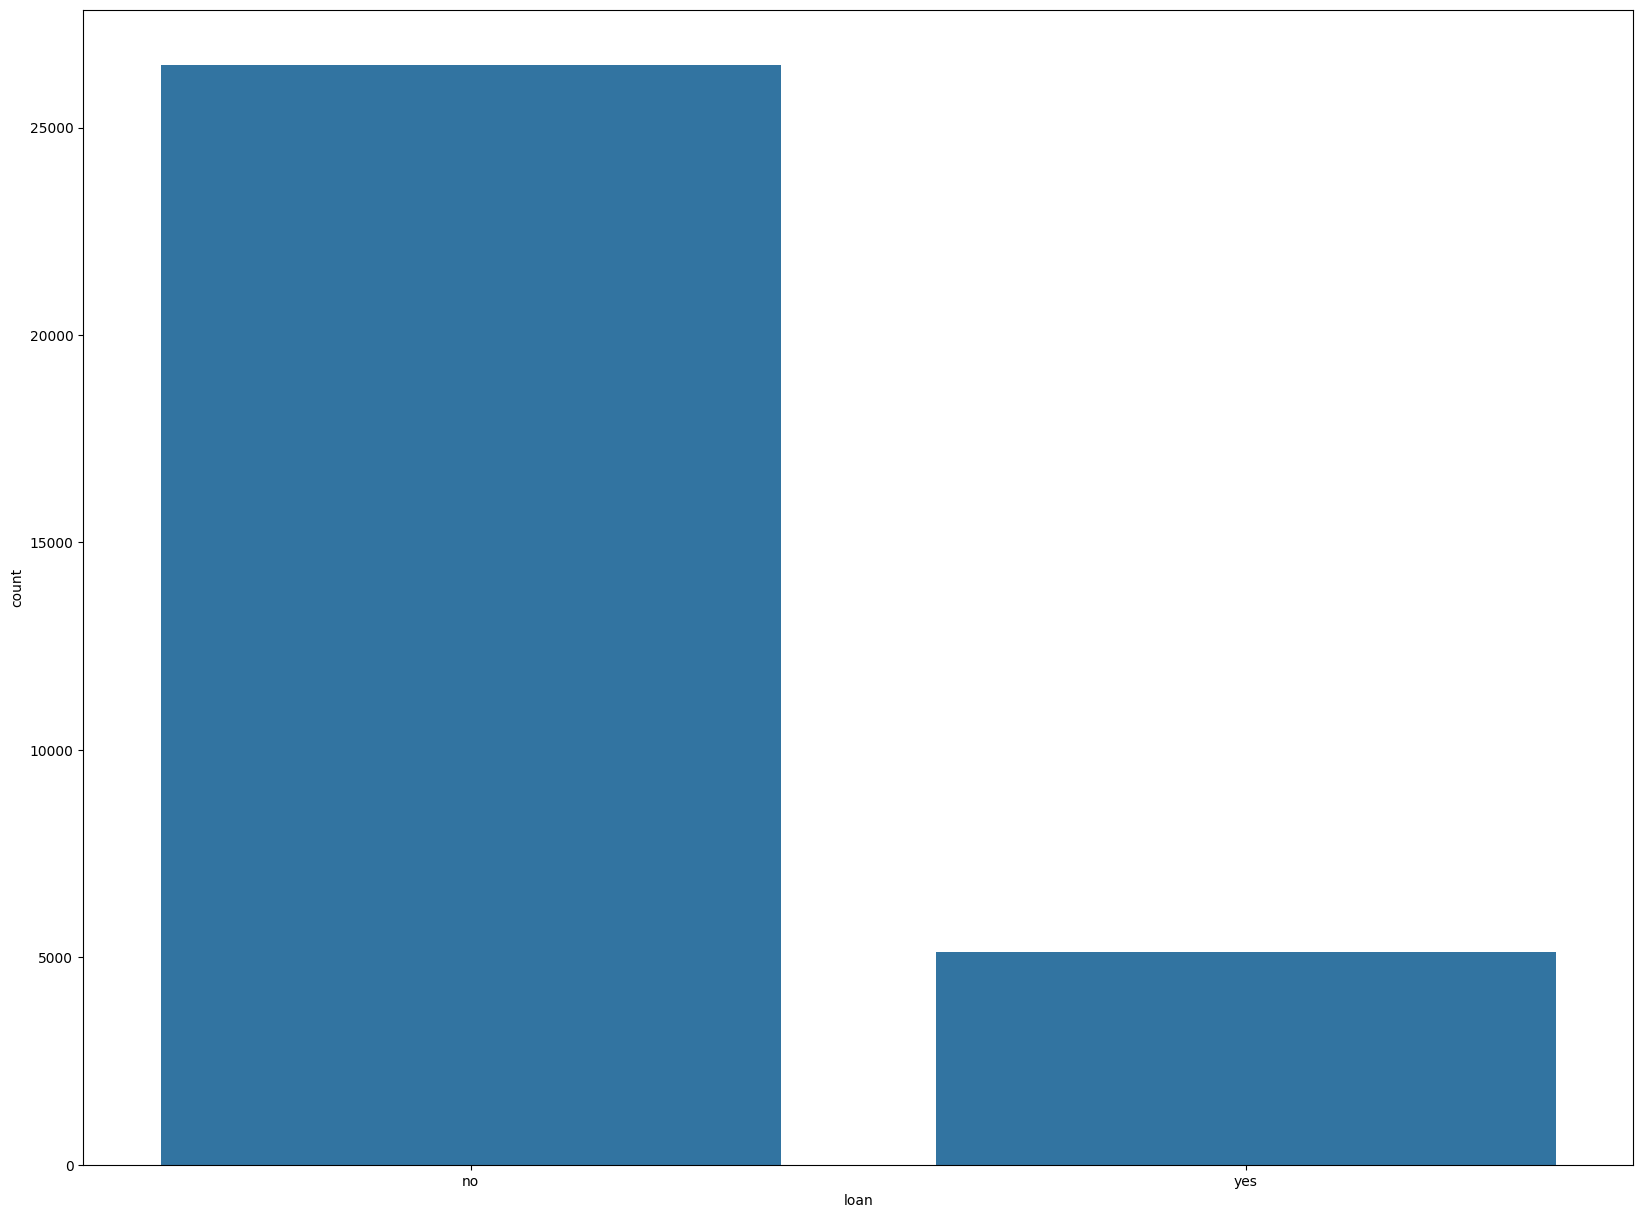

In [25]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.loan.value_counts())
plt.show()

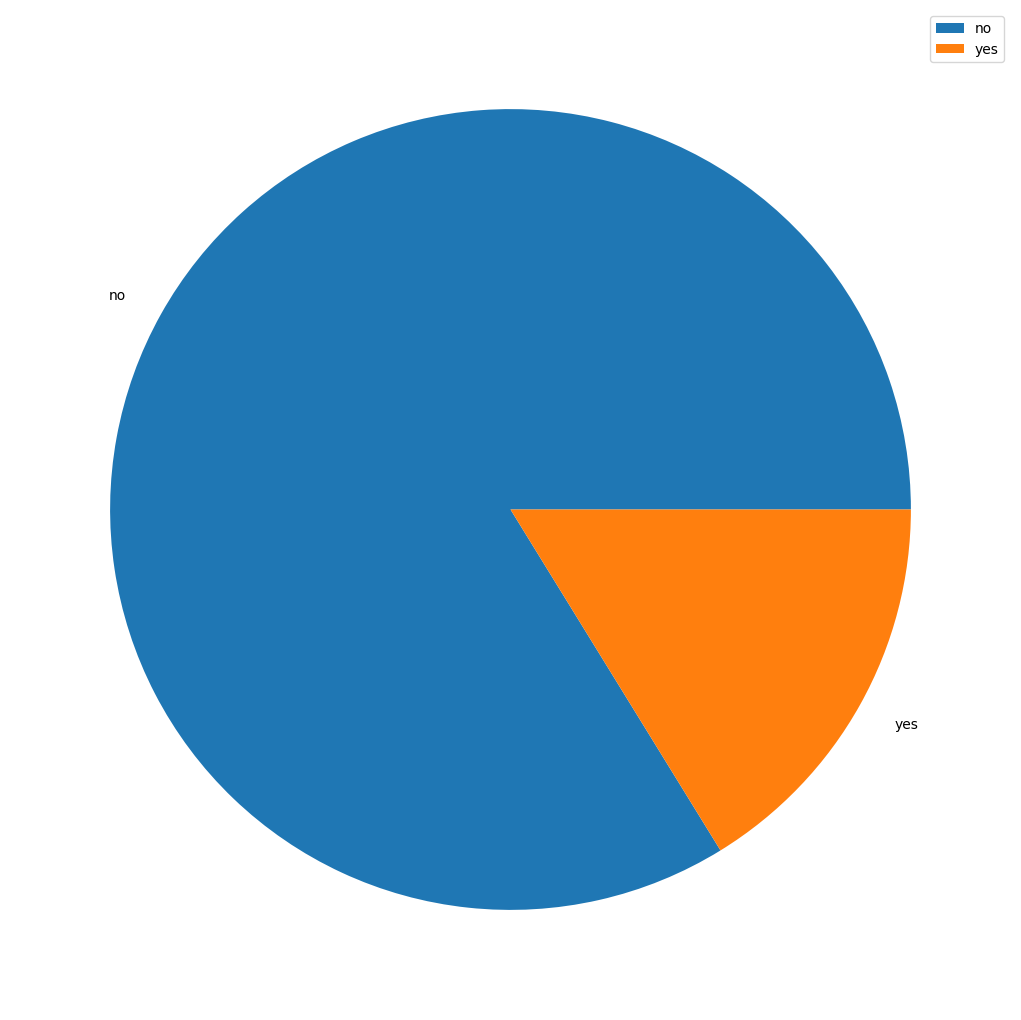

In [26]:
plt.figure(figsize = (20,13))
ax = df_train.loan.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

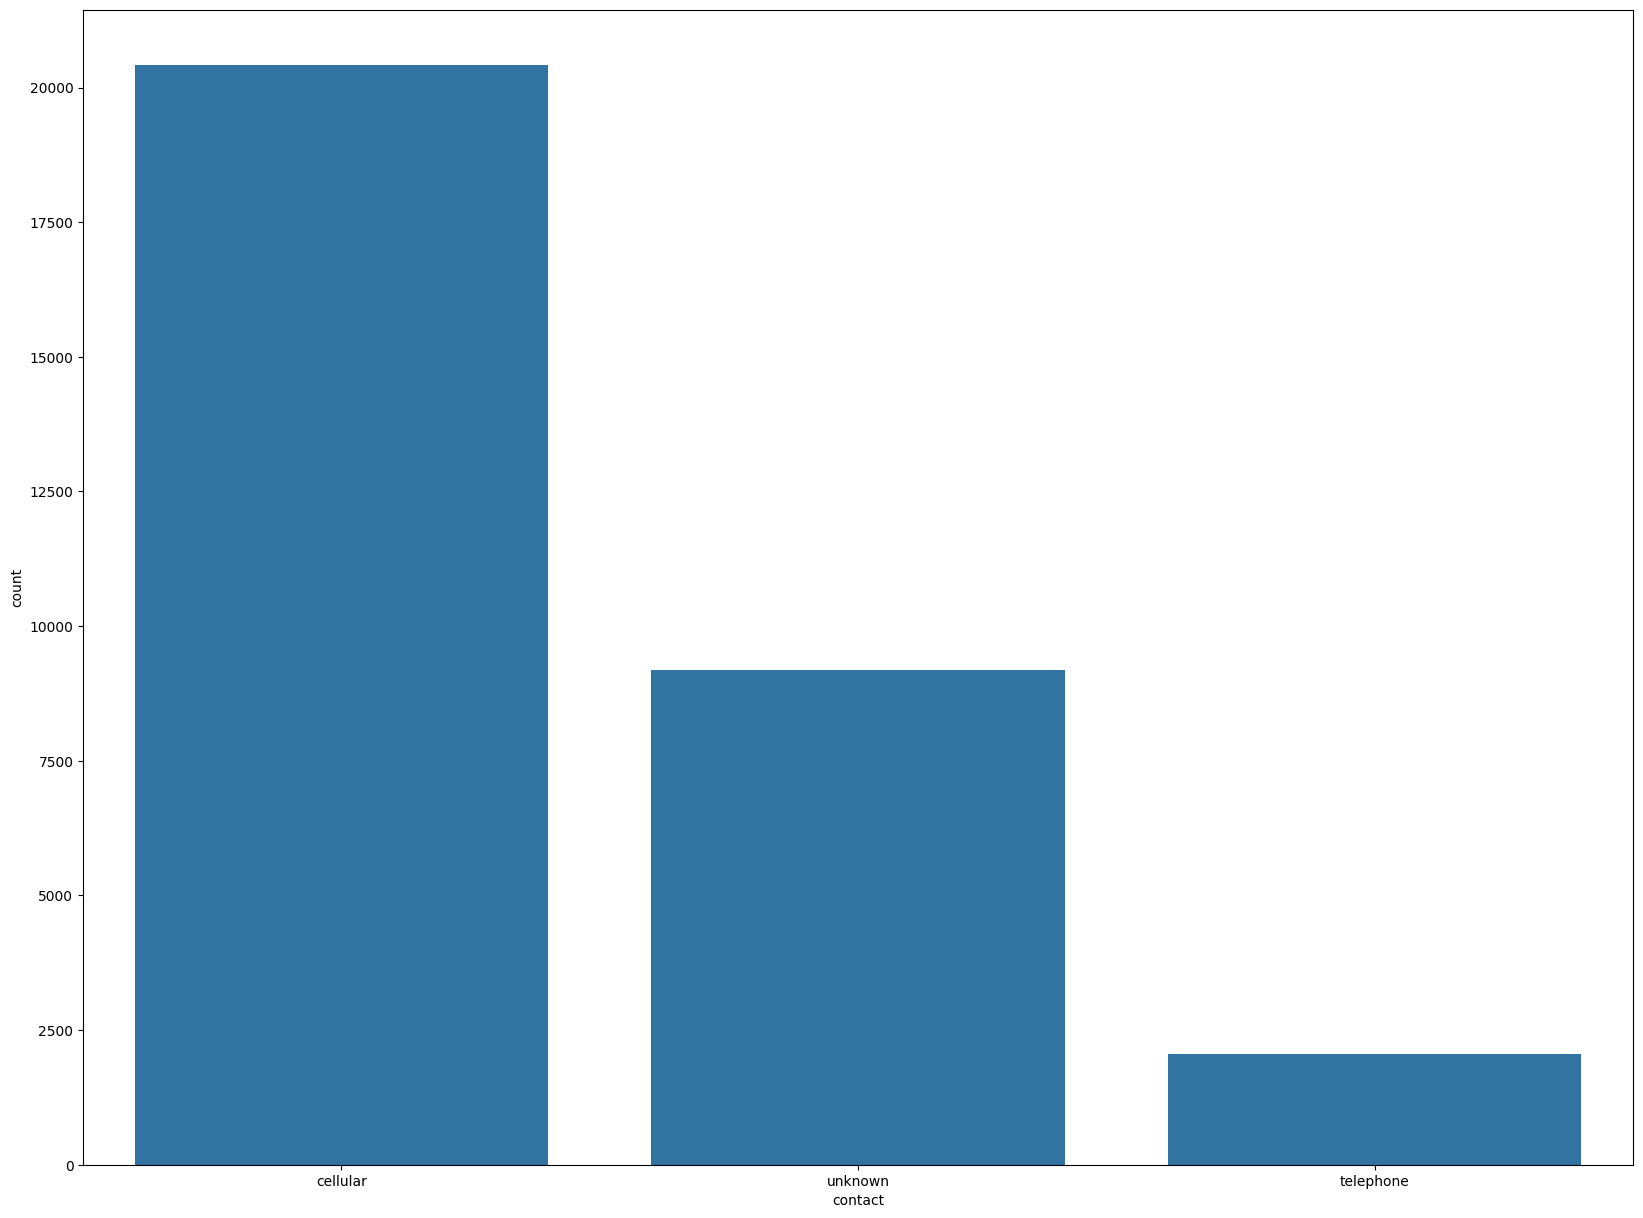

In [27]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.contact.value_counts())
plt.show()

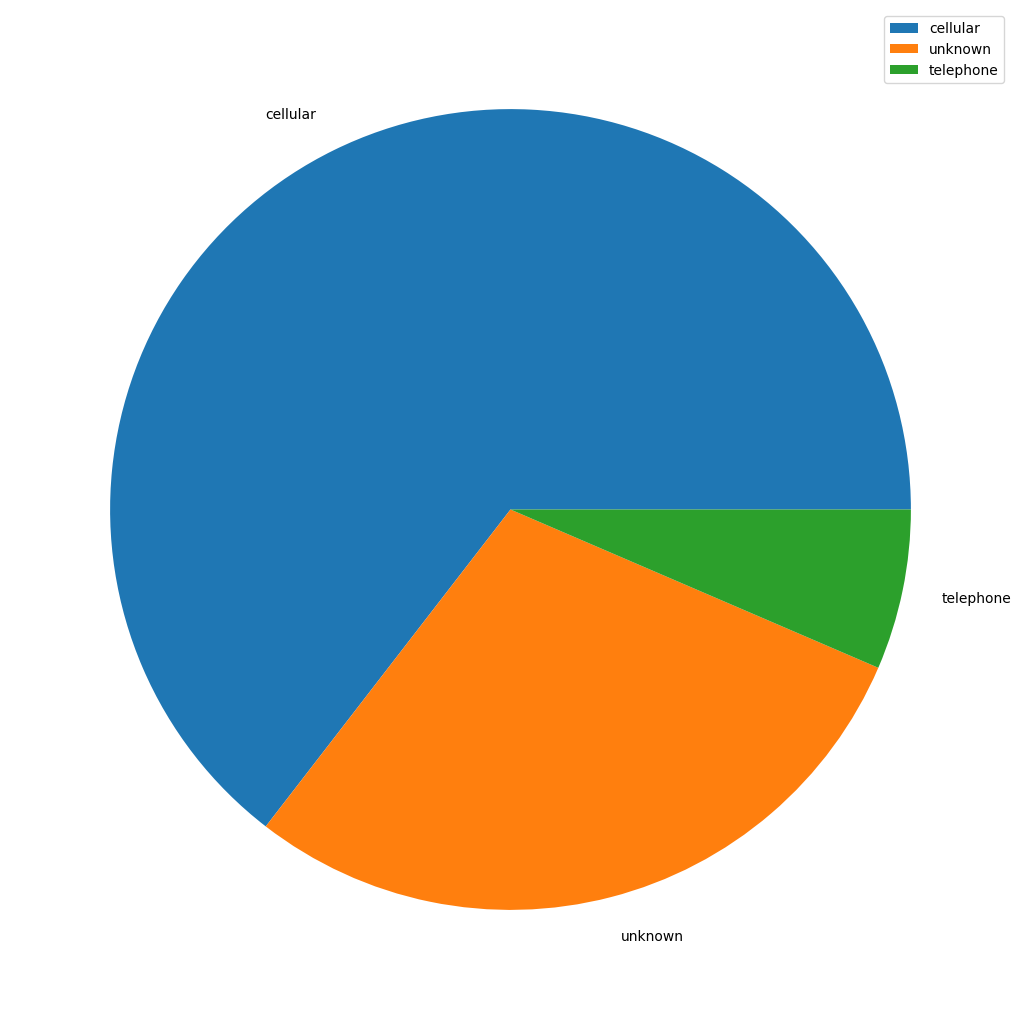

In [28]:
plt.figure(figsize = (20,13))
ax = df_train.contact.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

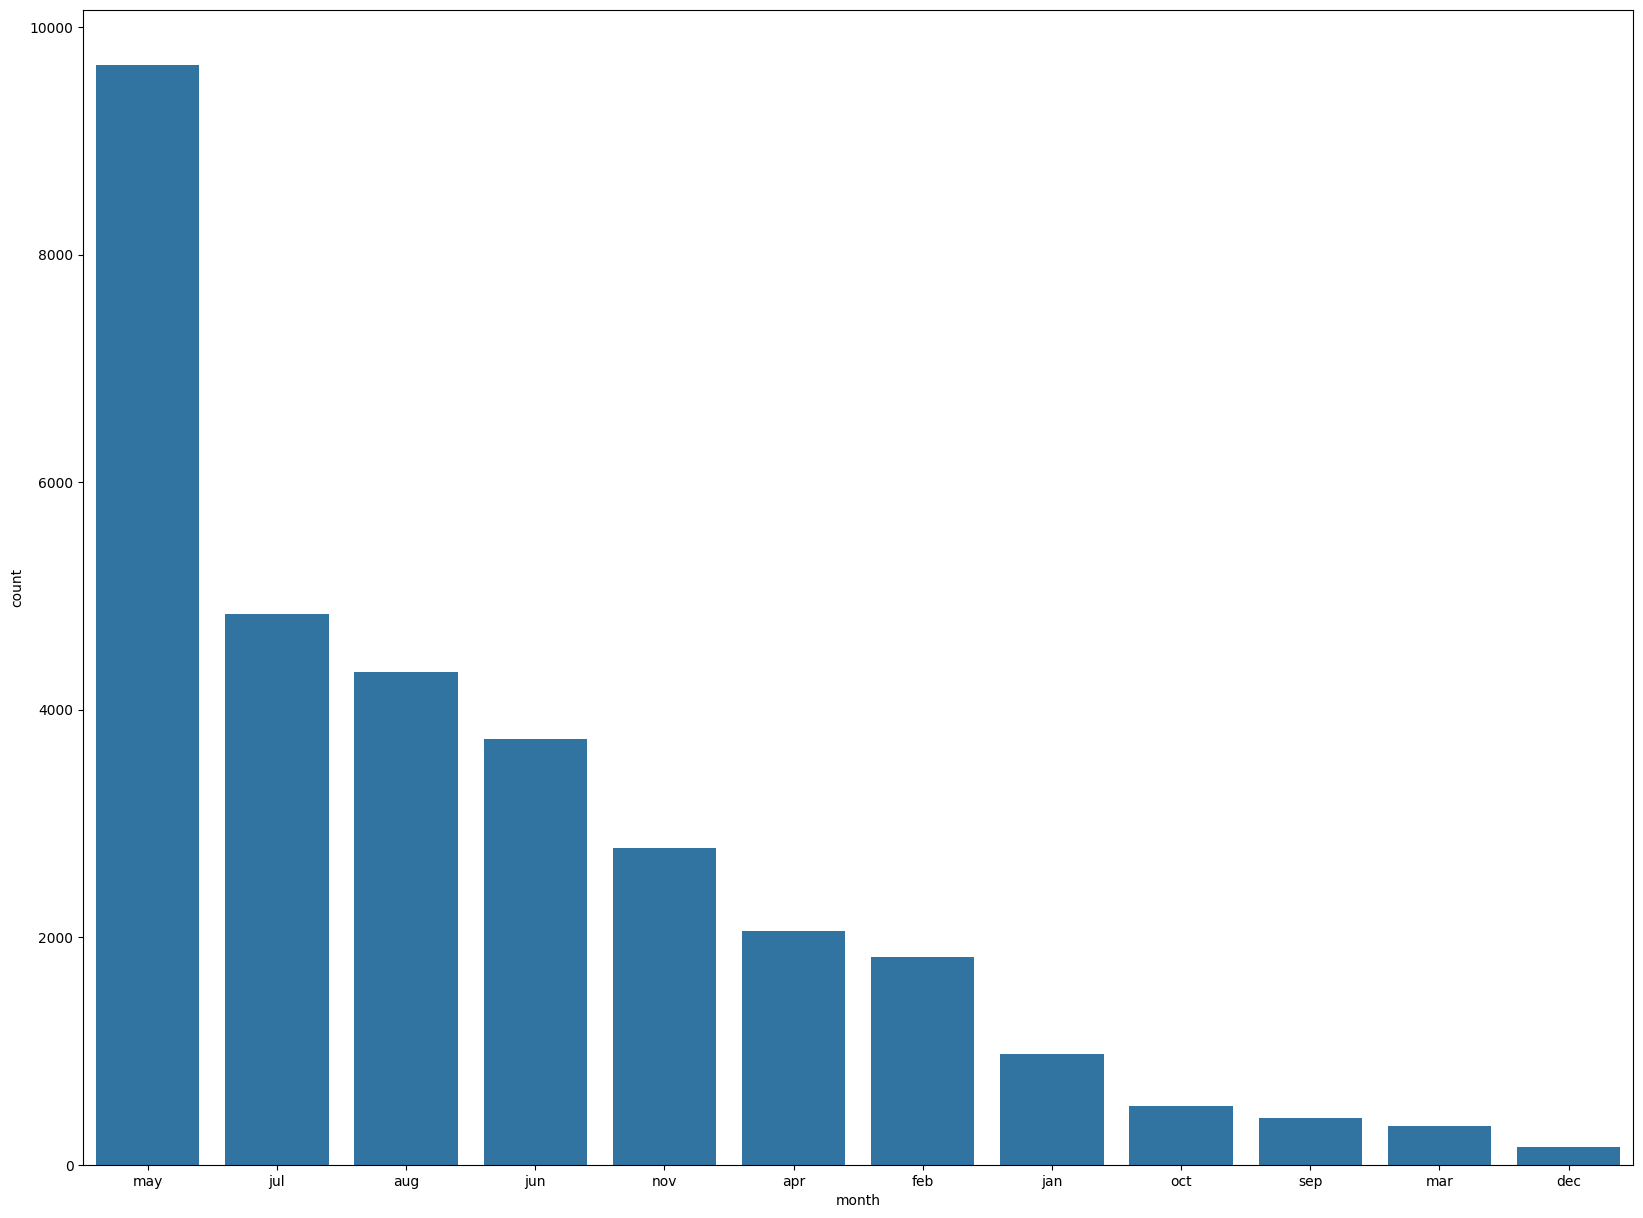

In [29]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.month.value_counts())
plt.show()

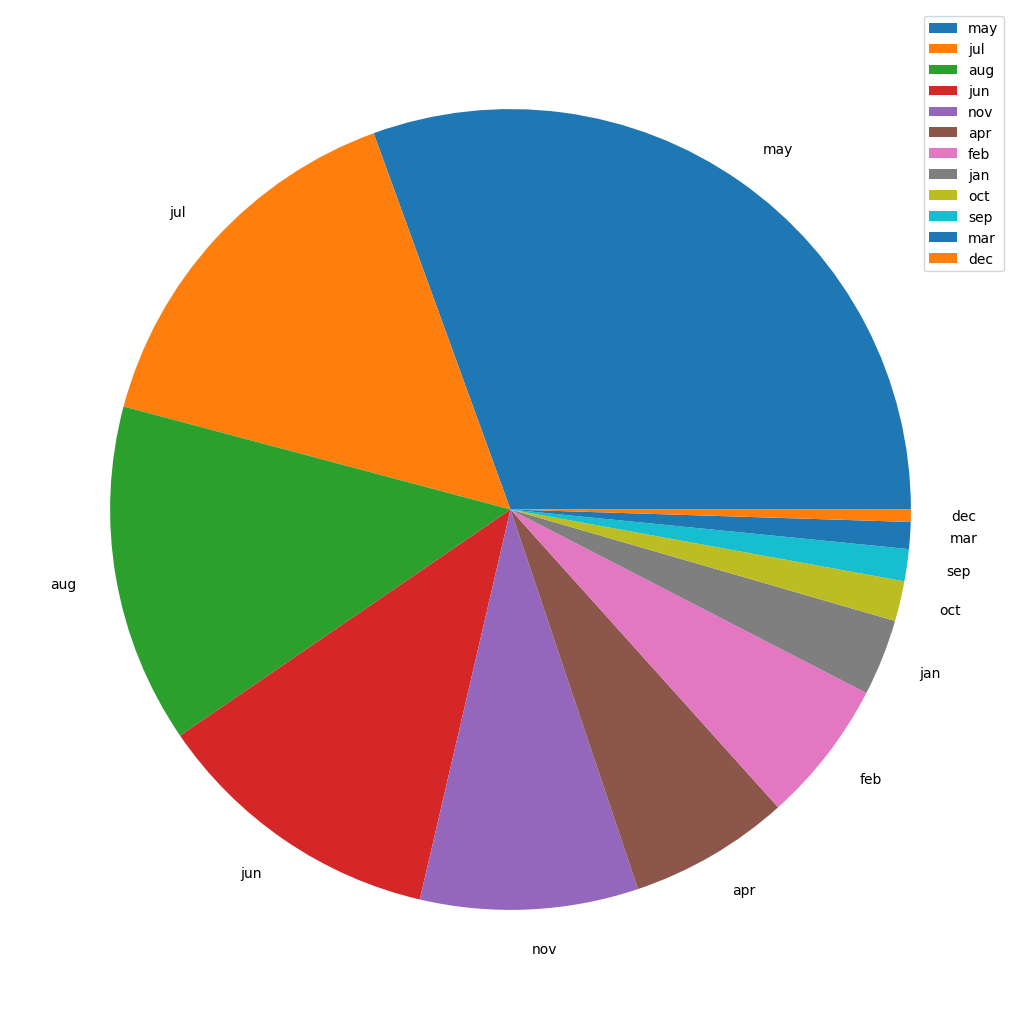

In [30]:
plt.figure(figsize = (20,13))
ax = df_train.month.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

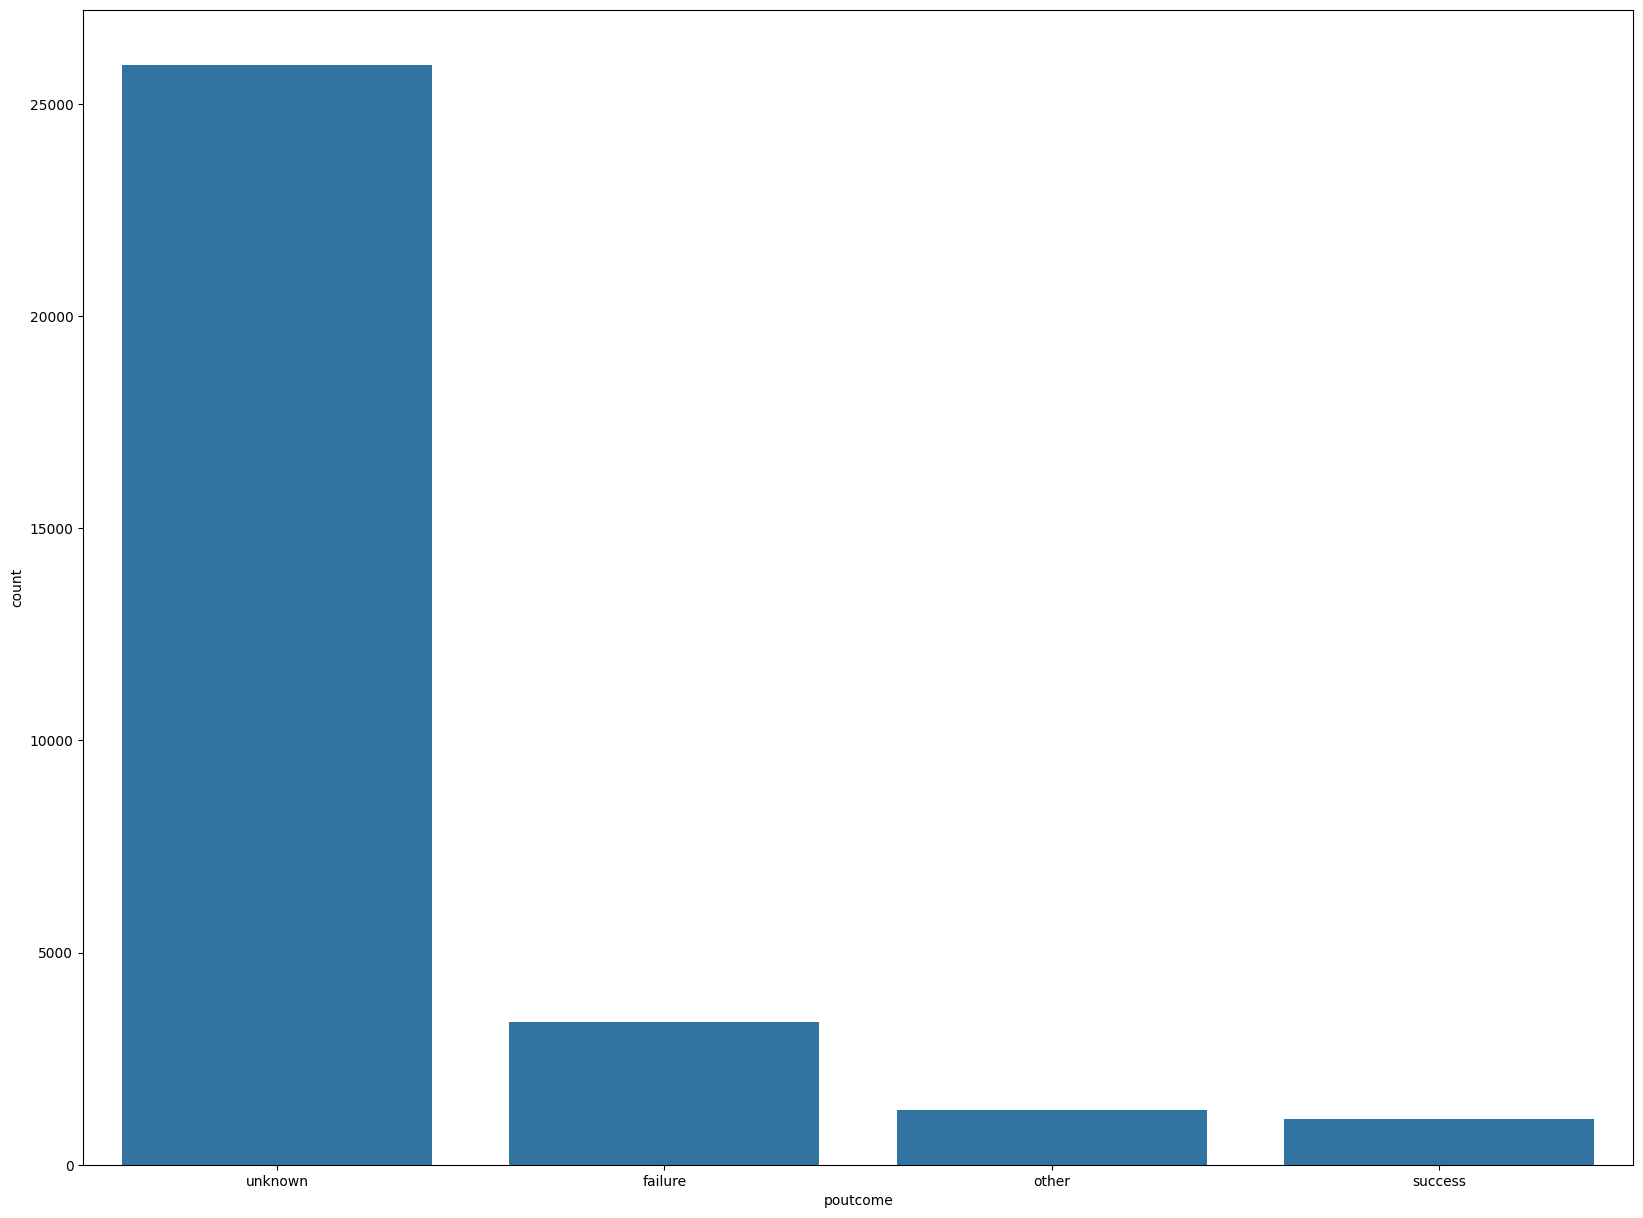

In [31]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.poutcome.value_counts())
plt.show()

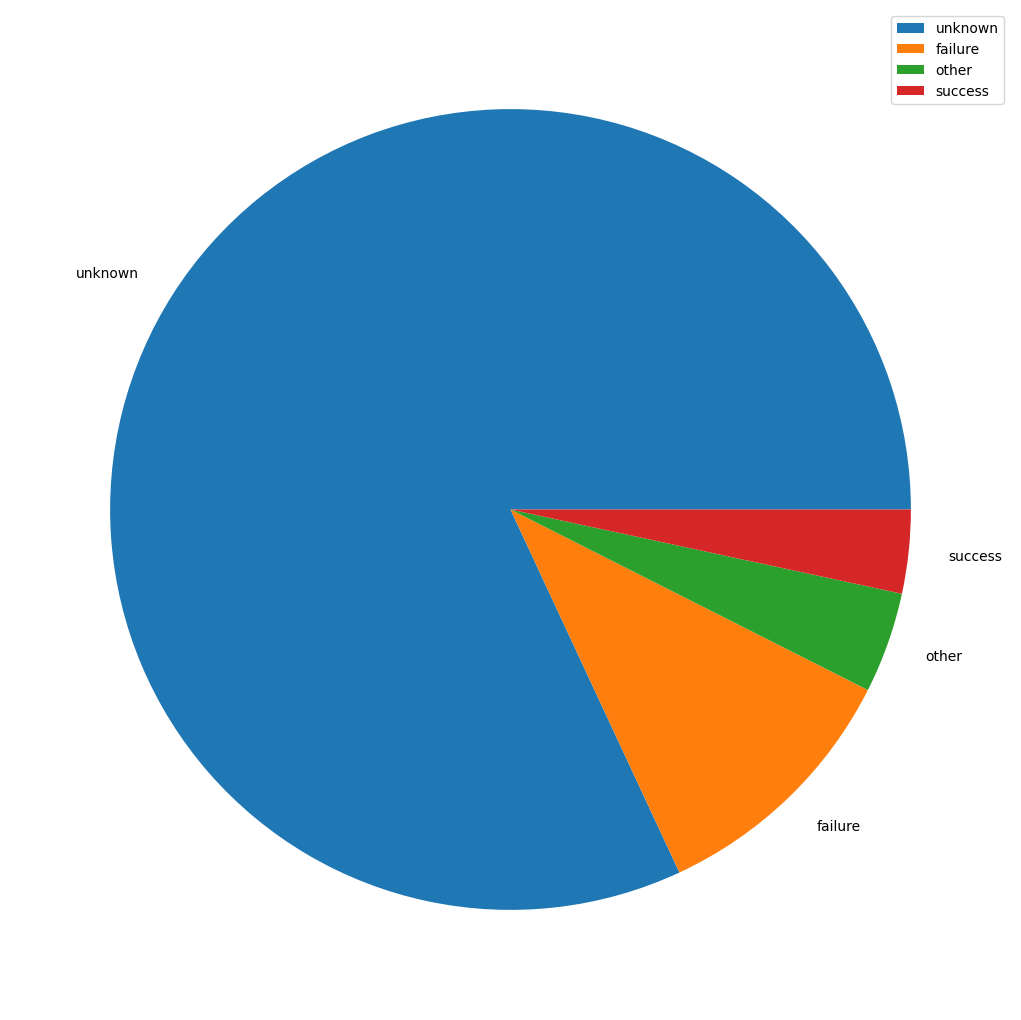

In [32]:
plt.figure(figsize = (20,13))
ax = df_train.poutcome.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

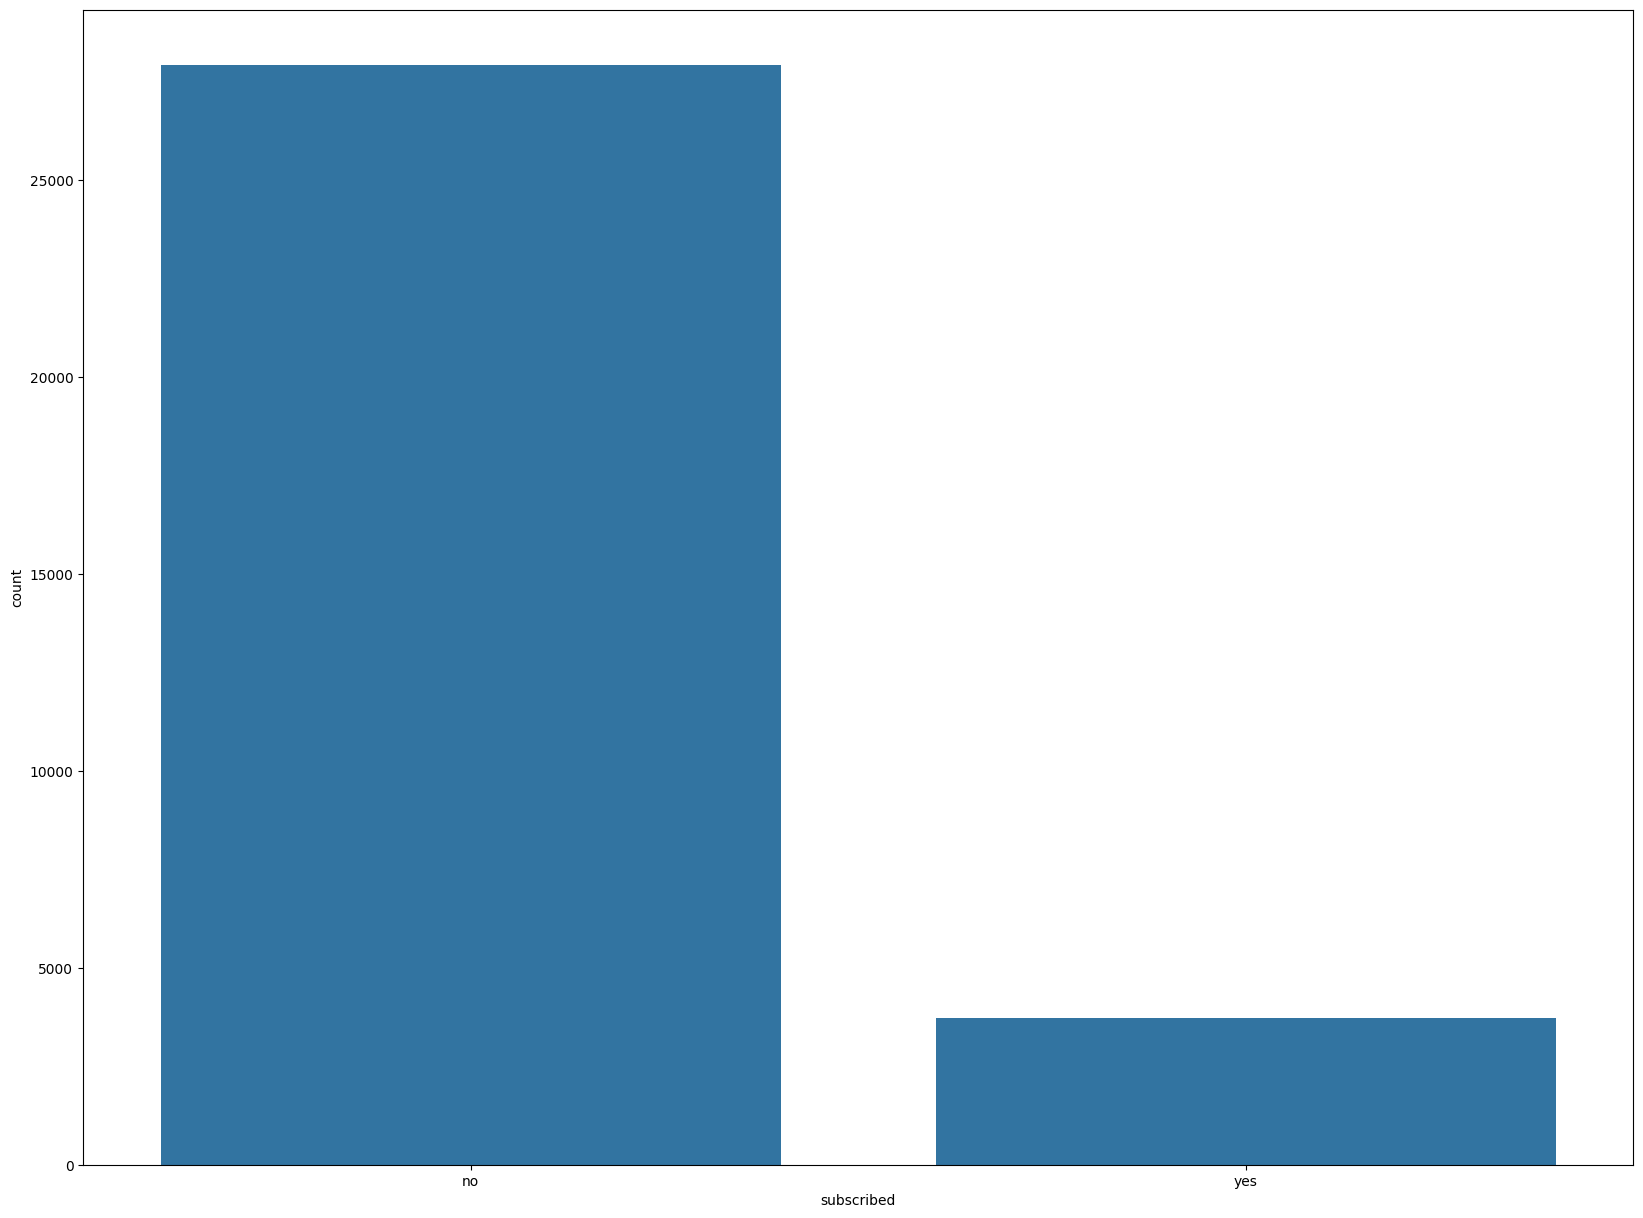

In [33]:
plt.figure(figsize = (20,15))
sns.barplot(df_train.subscribed.value_counts())
plt.show()

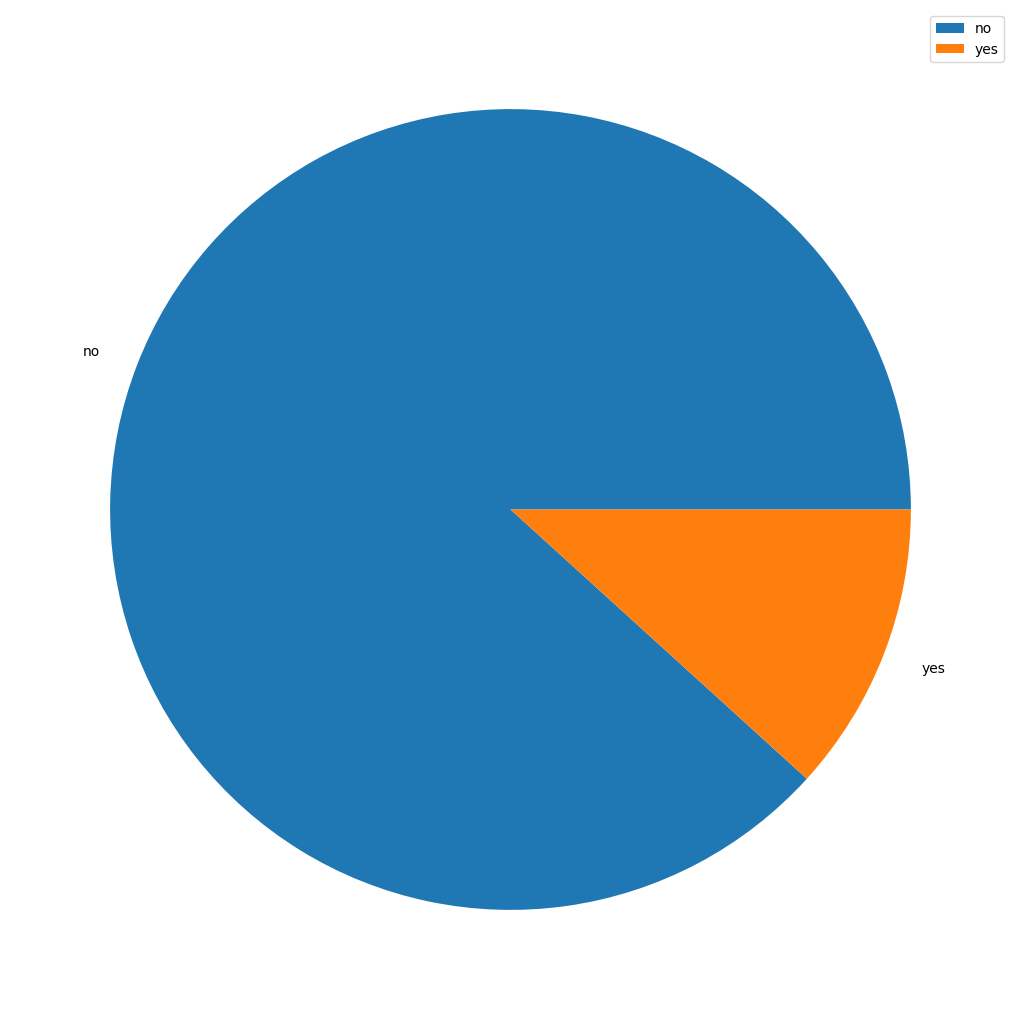

In [34]:
plt.figure(figsize = (20,13))
ax = df_train.subscribed.value_counts().plot(kind = 'pie',legend = True,ylabel = '')
ax.legend(loc = 'upper right')
plt.show()

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


<Figure size 2000x2500 with 0 Axes>

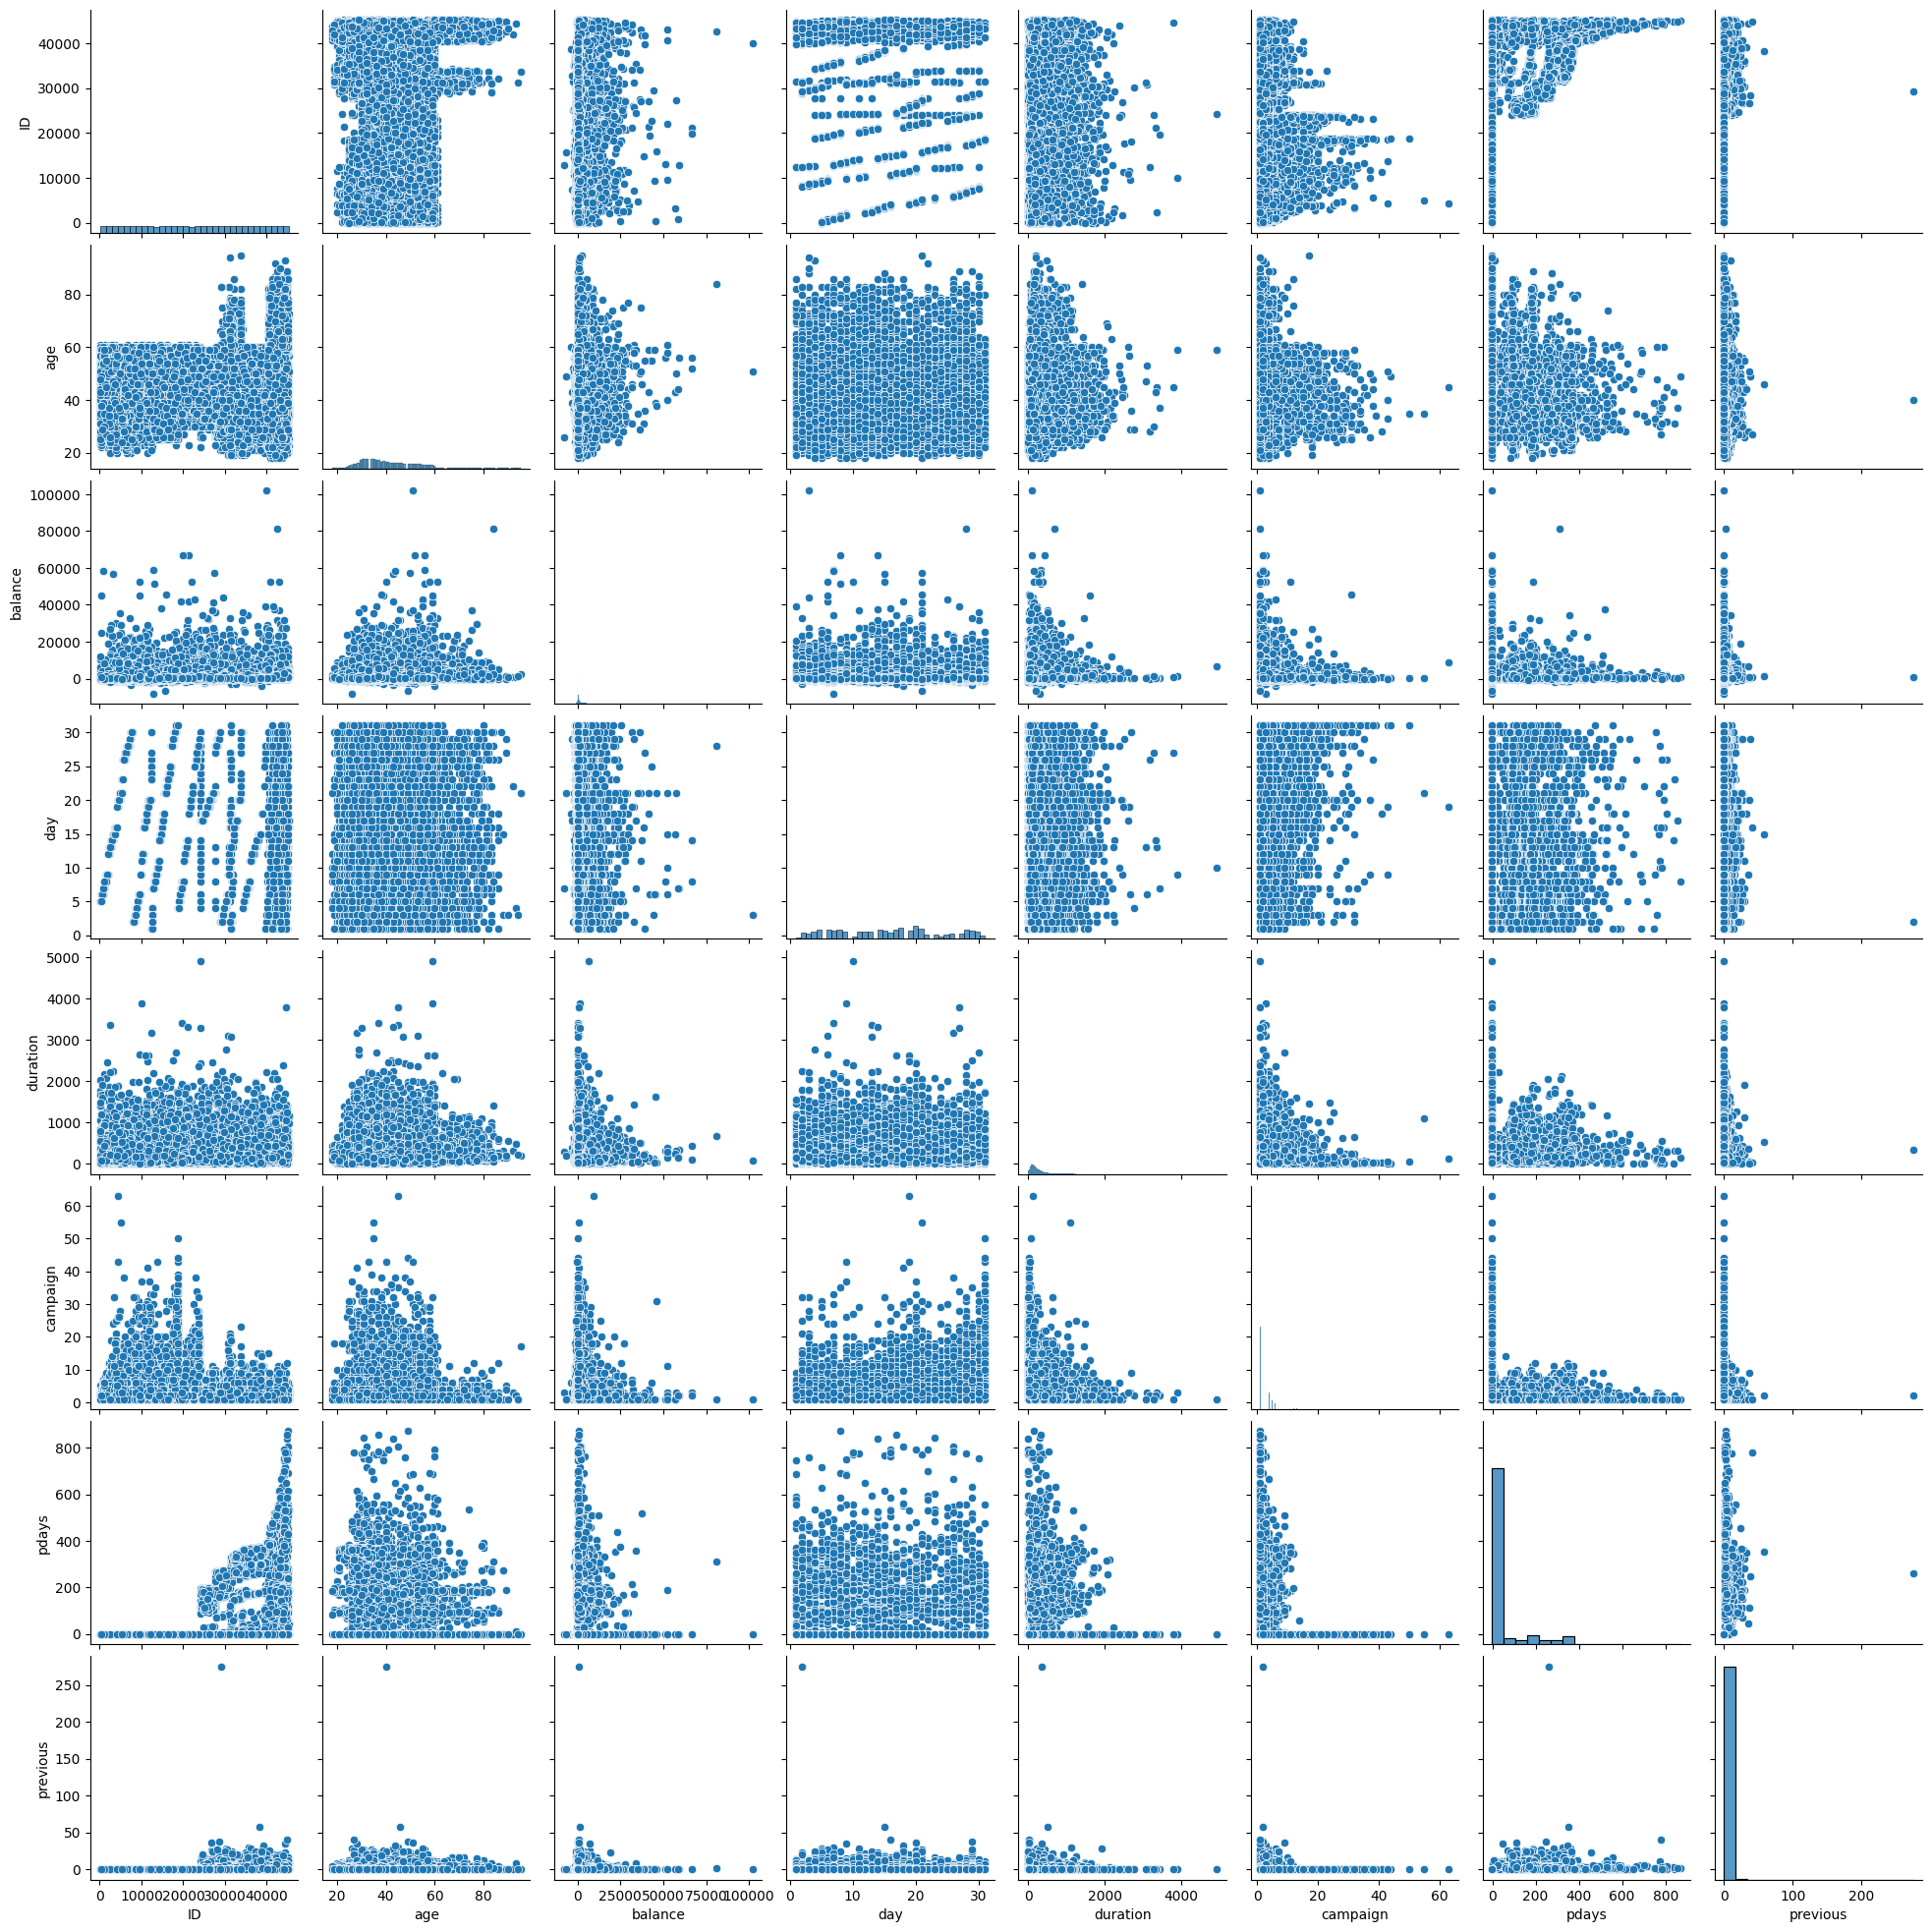

In [36]:
plt.figure(figsize = (20,25))
sns.pairplot(df_train)
plt.show()

In [37]:
# Drop unnecessary column ID
df_train.drop(columns = ['ID'],axis = 1, inplace = True)
df_test.drop(columns = ['ID'],axis = 1, inplace = True)

In [38]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

for column in categorical_col:
    df_train[column] = lab_enc.fit_transform(df_train[[column]])

In [39]:
df_train.sample(n = 5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
24580,54,3,1,1,0,1182,1,0,0,6,8,118,2,241,2,0,0
18975,57,0,1,1,0,567,1,0,0,2,3,87,2,265,3,1,0
23104,45,9,0,1,0,-357,1,1,0,18,8,618,1,355,2,0,1
12276,33,9,2,2,0,123,0,0,0,19,1,264,1,-1,0,3,0
14958,39,0,1,1,0,260,1,0,0,13,9,226,1,94,4,2,1


In [40]:
for column in categorical_col:
    if column != 'subscribed':
        df_test[column] = lab_enc.fit_transform(df_test[[column]])

In [41]:
df_test.sample(n = 5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1615,52,4,1,1,0,428,1,0,2,30,8,153,1,-1,0,3
12436,25,4,2,2,0,99,1,1,2,16,8,102,4,-1,0,3
7396,32,10,2,2,0,5874,0,0,0,3,3,298,1,-1,0,3
12874,35,9,2,2,0,18,1,1,2,11,6,111,10,-1,0,3
144,28,4,1,2,0,395,0,0,2,21,8,178,1,-1,0,3


In [42]:
# Check distribution

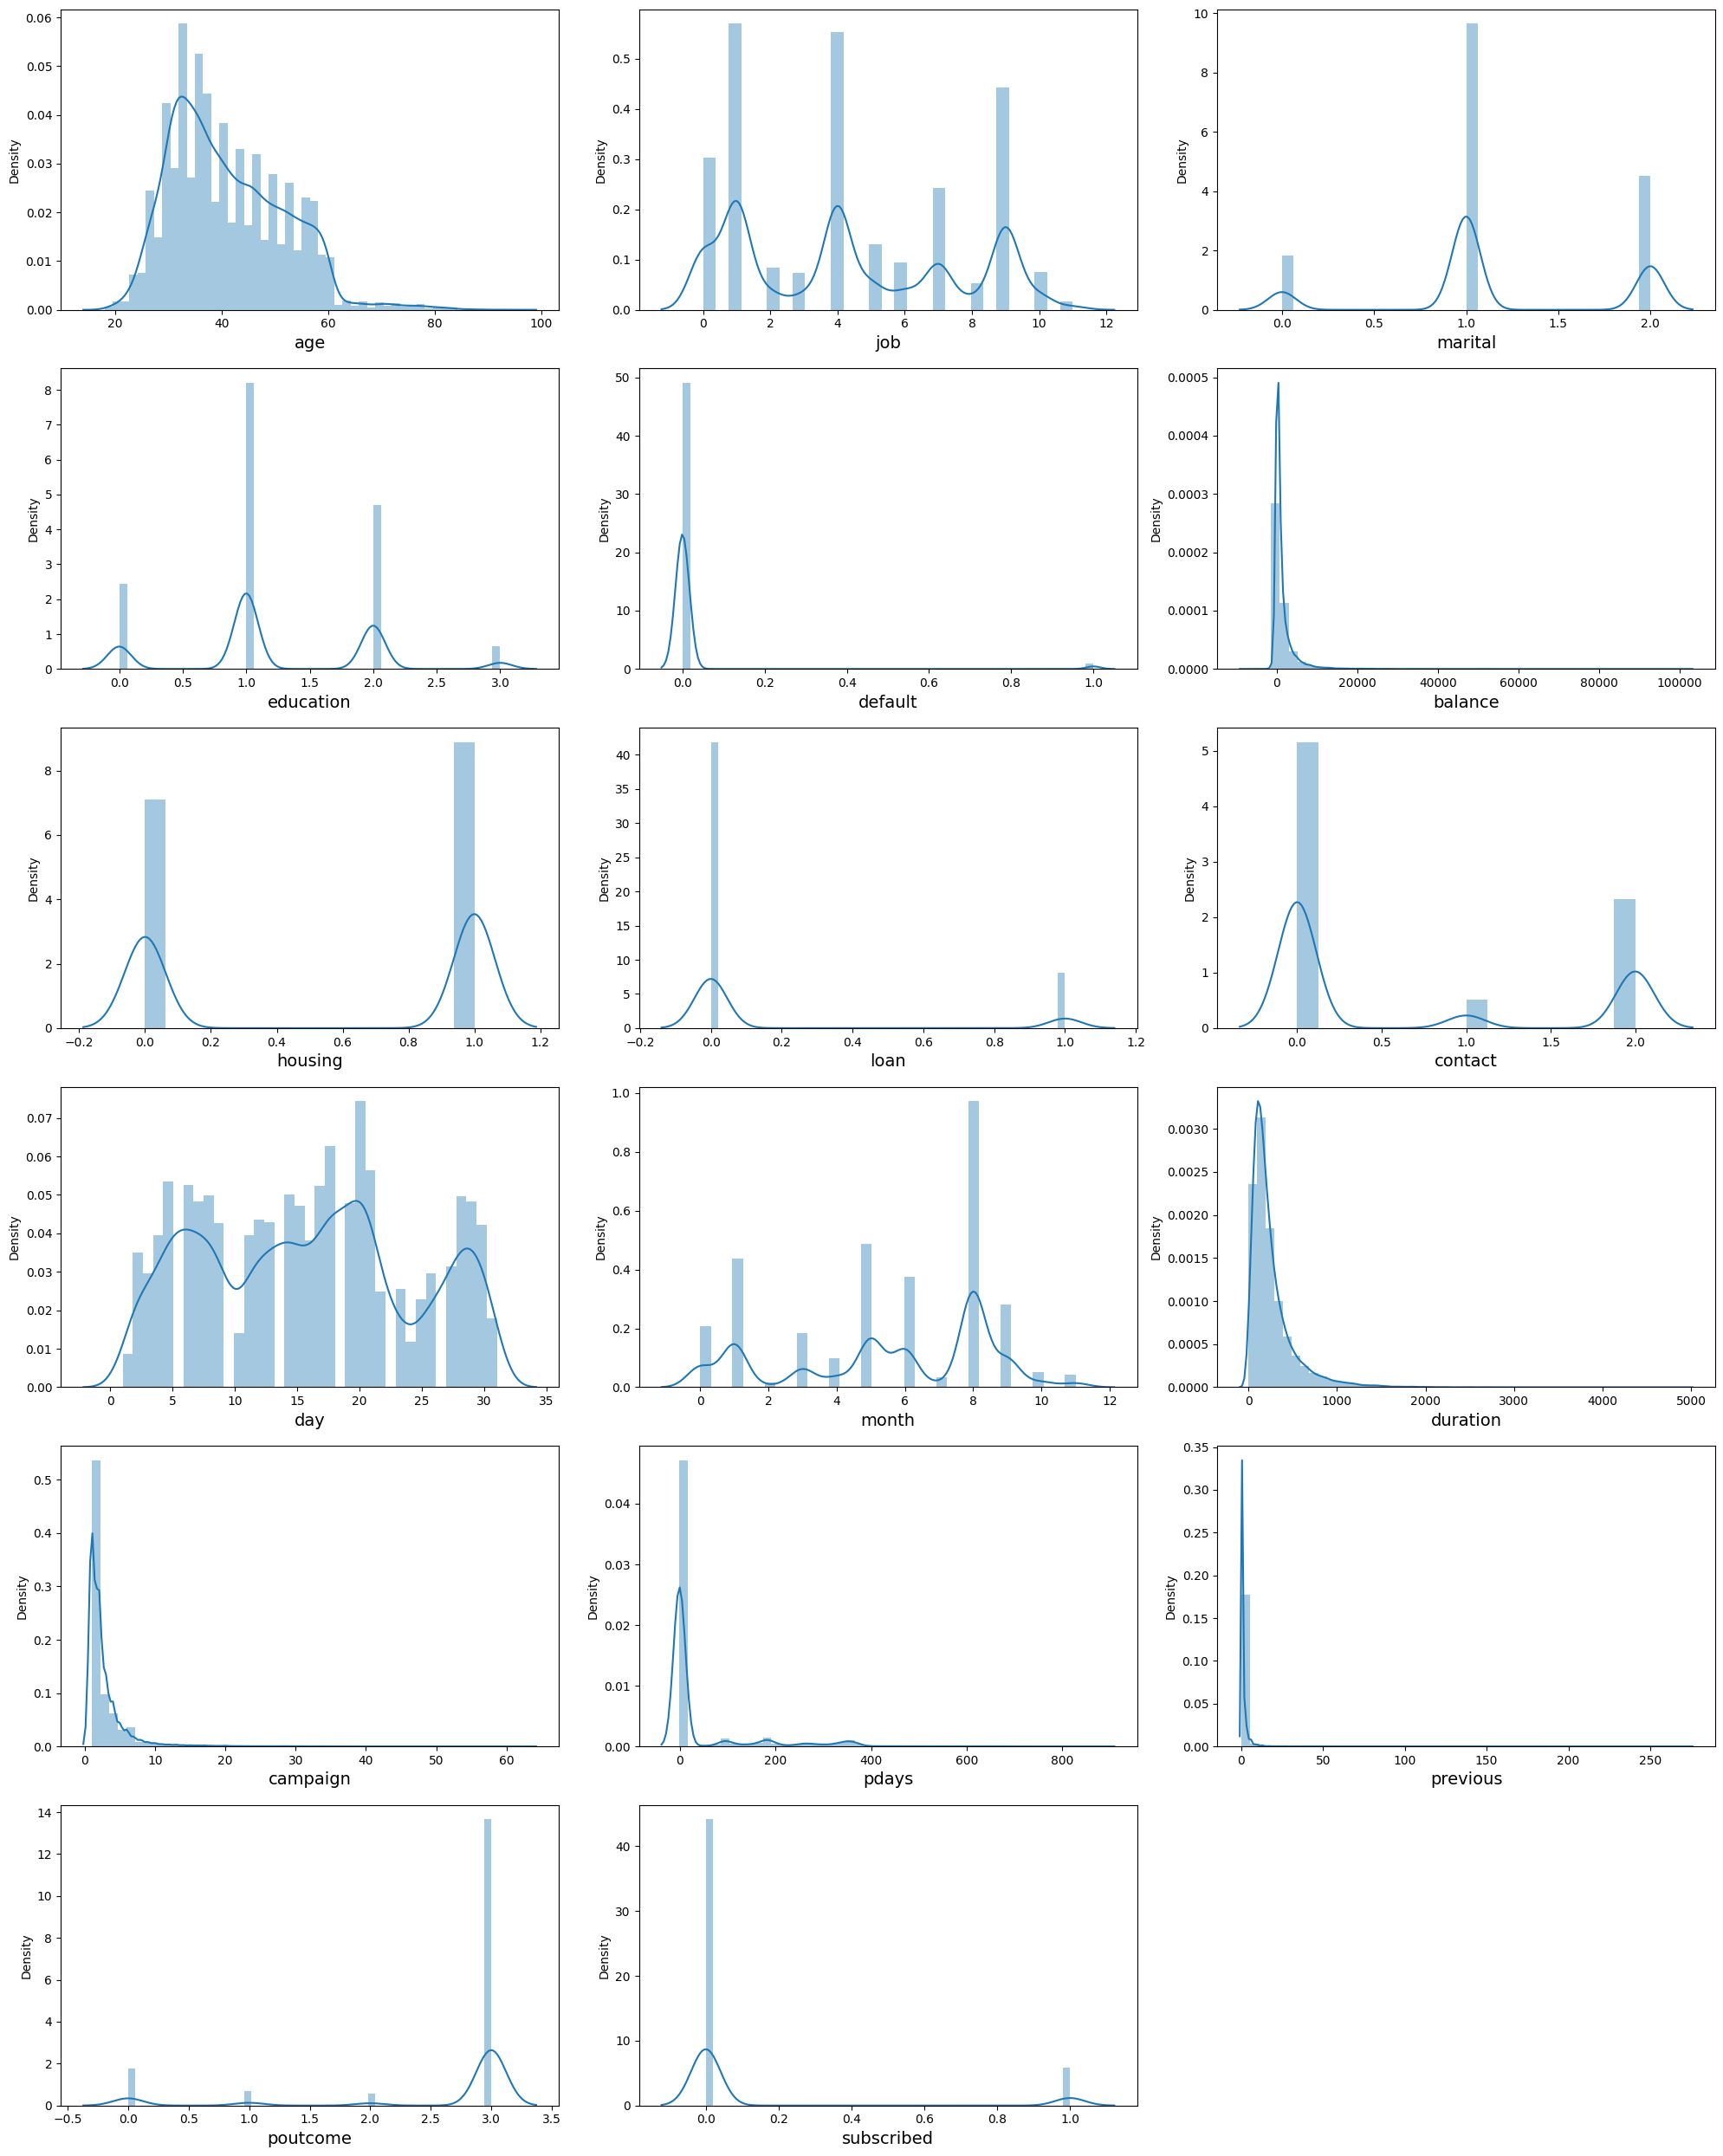

In [43]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df_train.columns:
    if plotnumber <= df_train.shape[1]:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize = 14)
    plotnumber += 1
plt.tight_layout()

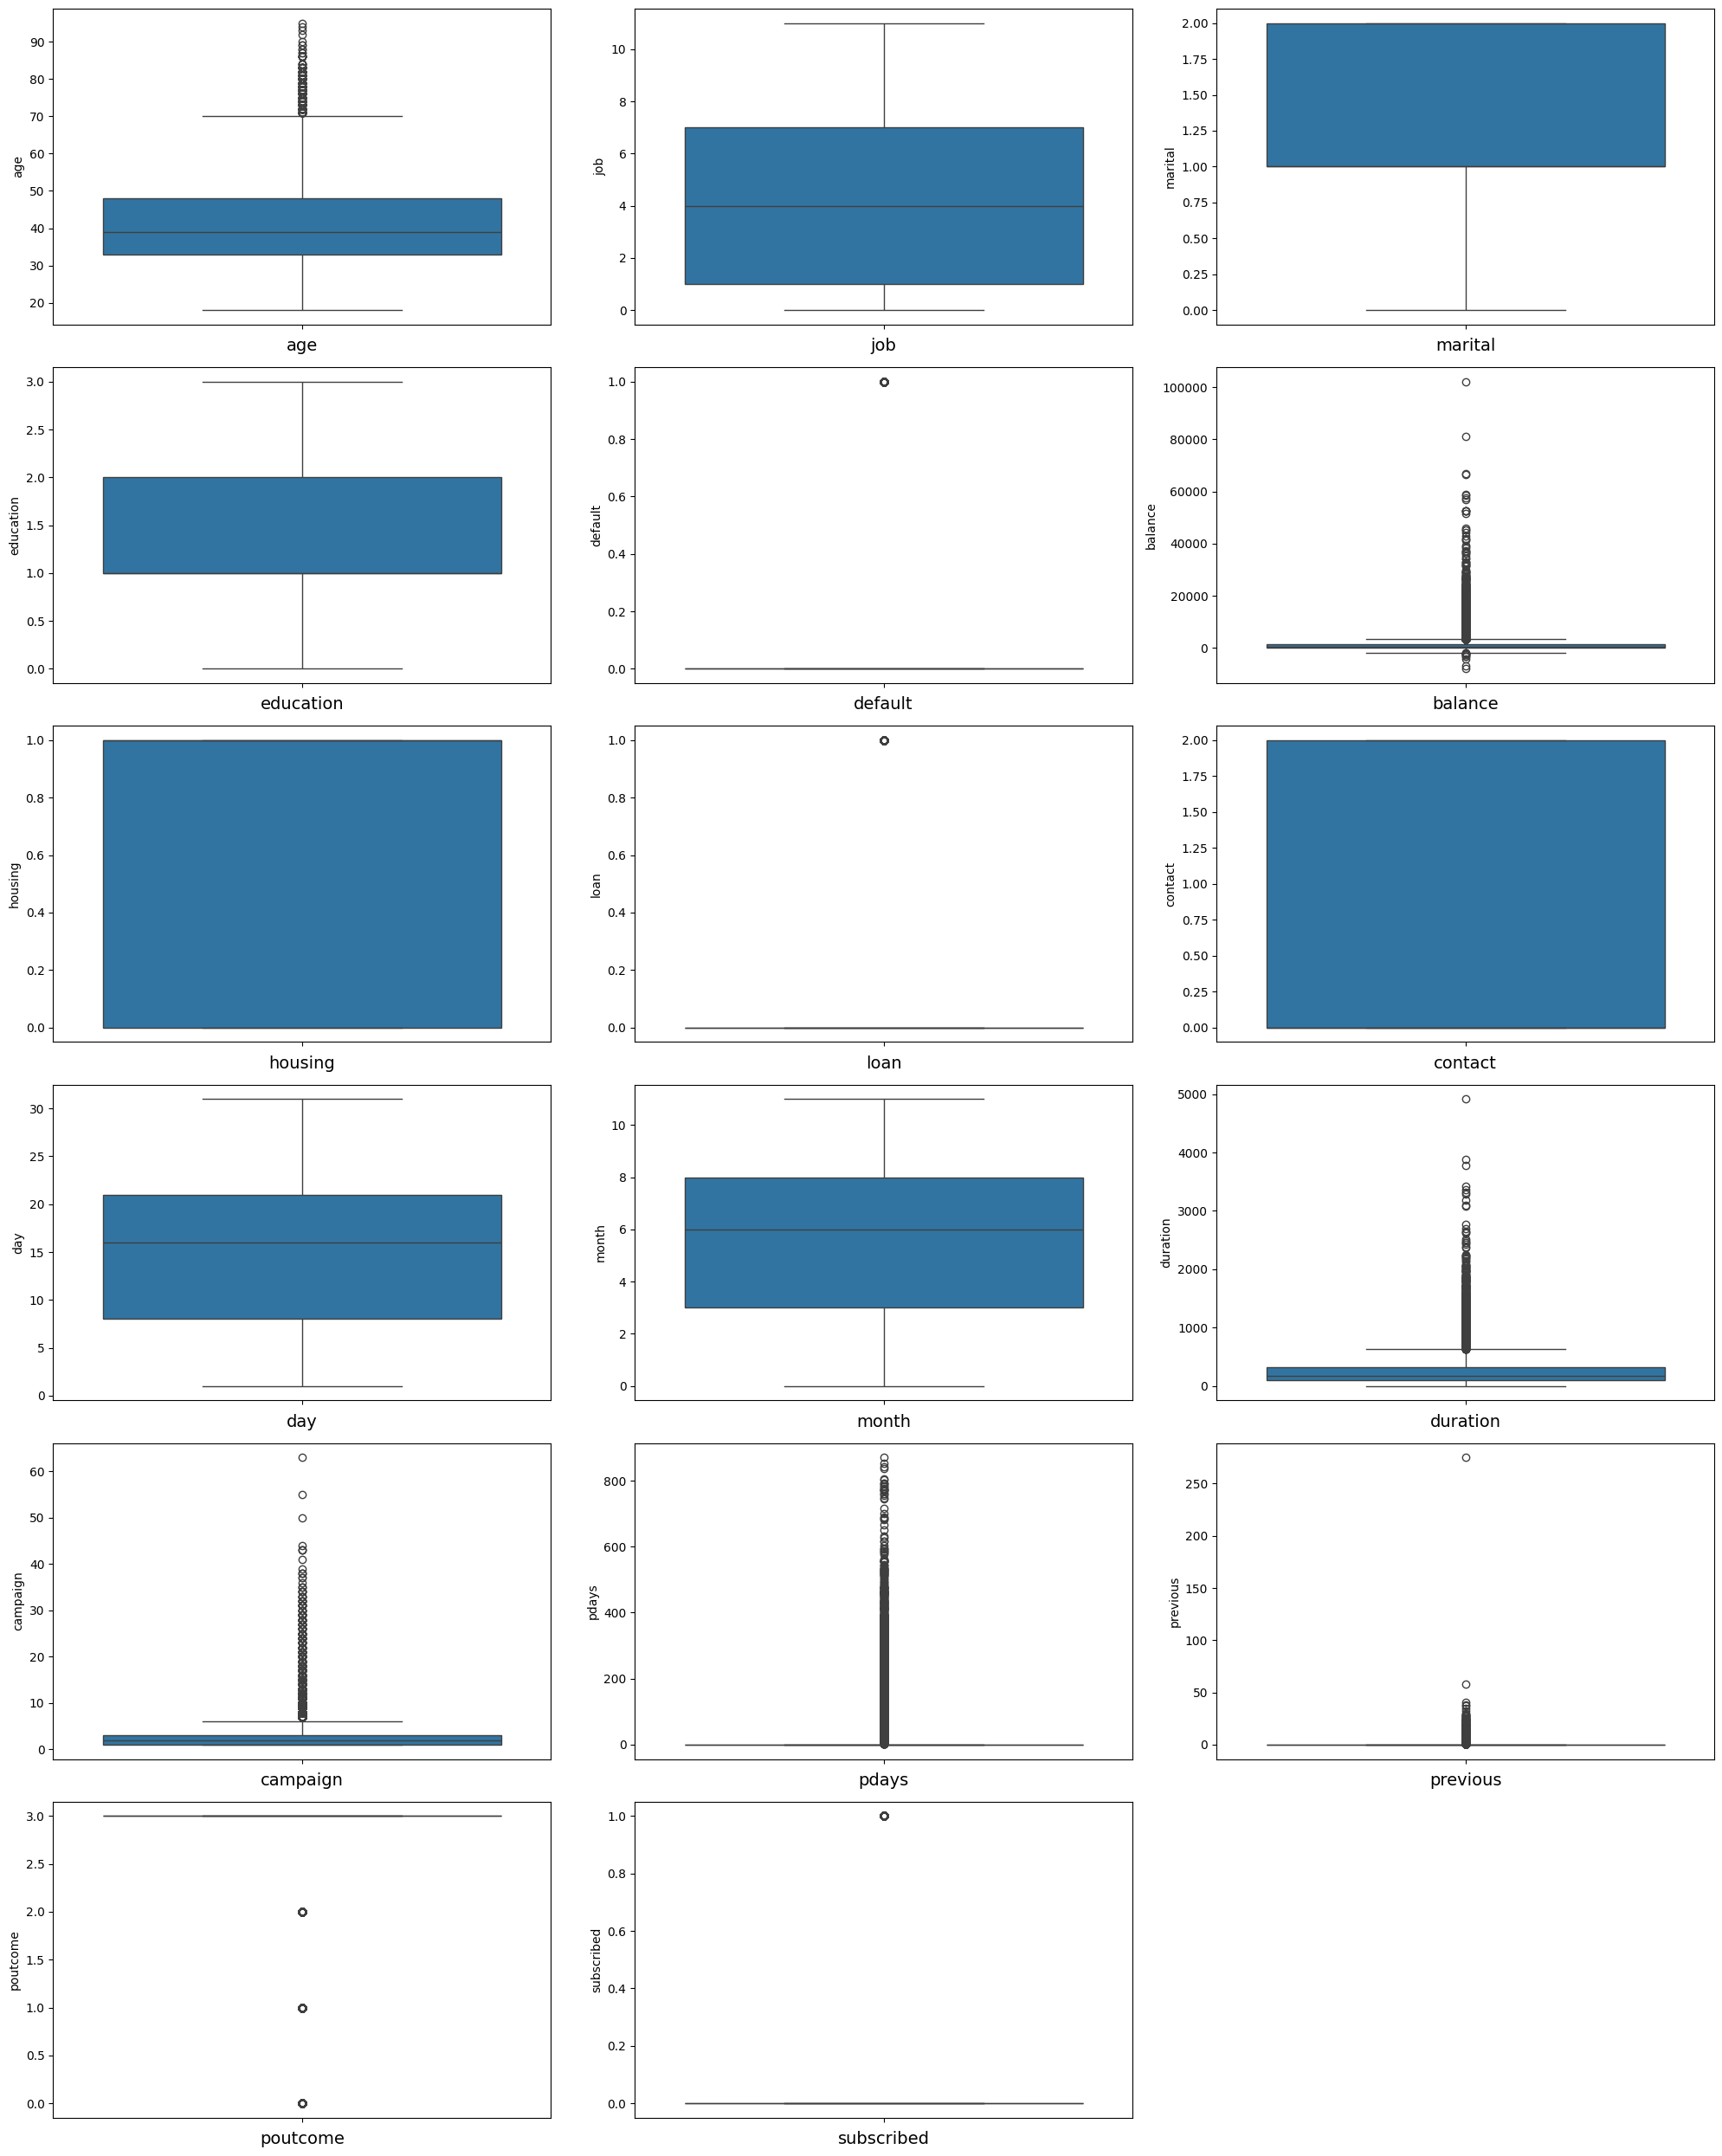

In [44]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df_train.columns:
    if plotnumber <= df_train.shape[1]:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df_train[column])
        plt.xlabel(column,fontsize = 14)
    plotnumber += 1
plt.tight_layout()

In [45]:
df_train.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [46]:
from scipy.stats import zscore
z_score = zscore(df_train[['age','balance','duration','campaign']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df_train = df_train[filtering_entry]
df_train.shape

(29621, 17)

In [47]:
df_train.skew()

age            0.450185
job            0.268121
marital       -0.104468
education      0.209551
default        7.072027
balance        2.445199
housing       -0.252706
loan           1.804966
contact        0.761441
day            0.101497
month         -0.505871
duration       1.589653
campaign       2.060107
pdays          2.611234
previous      50.241086
poutcome      -1.966417
subscribed     2.571441
dtype: float64

In [48]:
from scipy.stats import zscore
z_score = zscore(df_train[['pdays','previous']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df_train = df_train[filtering_entry]
df_train.shape

(28179, 17)

In [49]:
df_train.skew()

age           0.438489
job           0.261125
marital      -0.096788
education     0.200932
default       7.014849
balance       2.439932
housing      -0.206865
loan          1.787408
contact       0.697340
day           0.074527
month        -0.472150
duration      1.594955
campaign      2.059787
pdays         2.809269
previous      3.666515
poutcome     -2.448366
subscribed    2.636194
dtype: float64

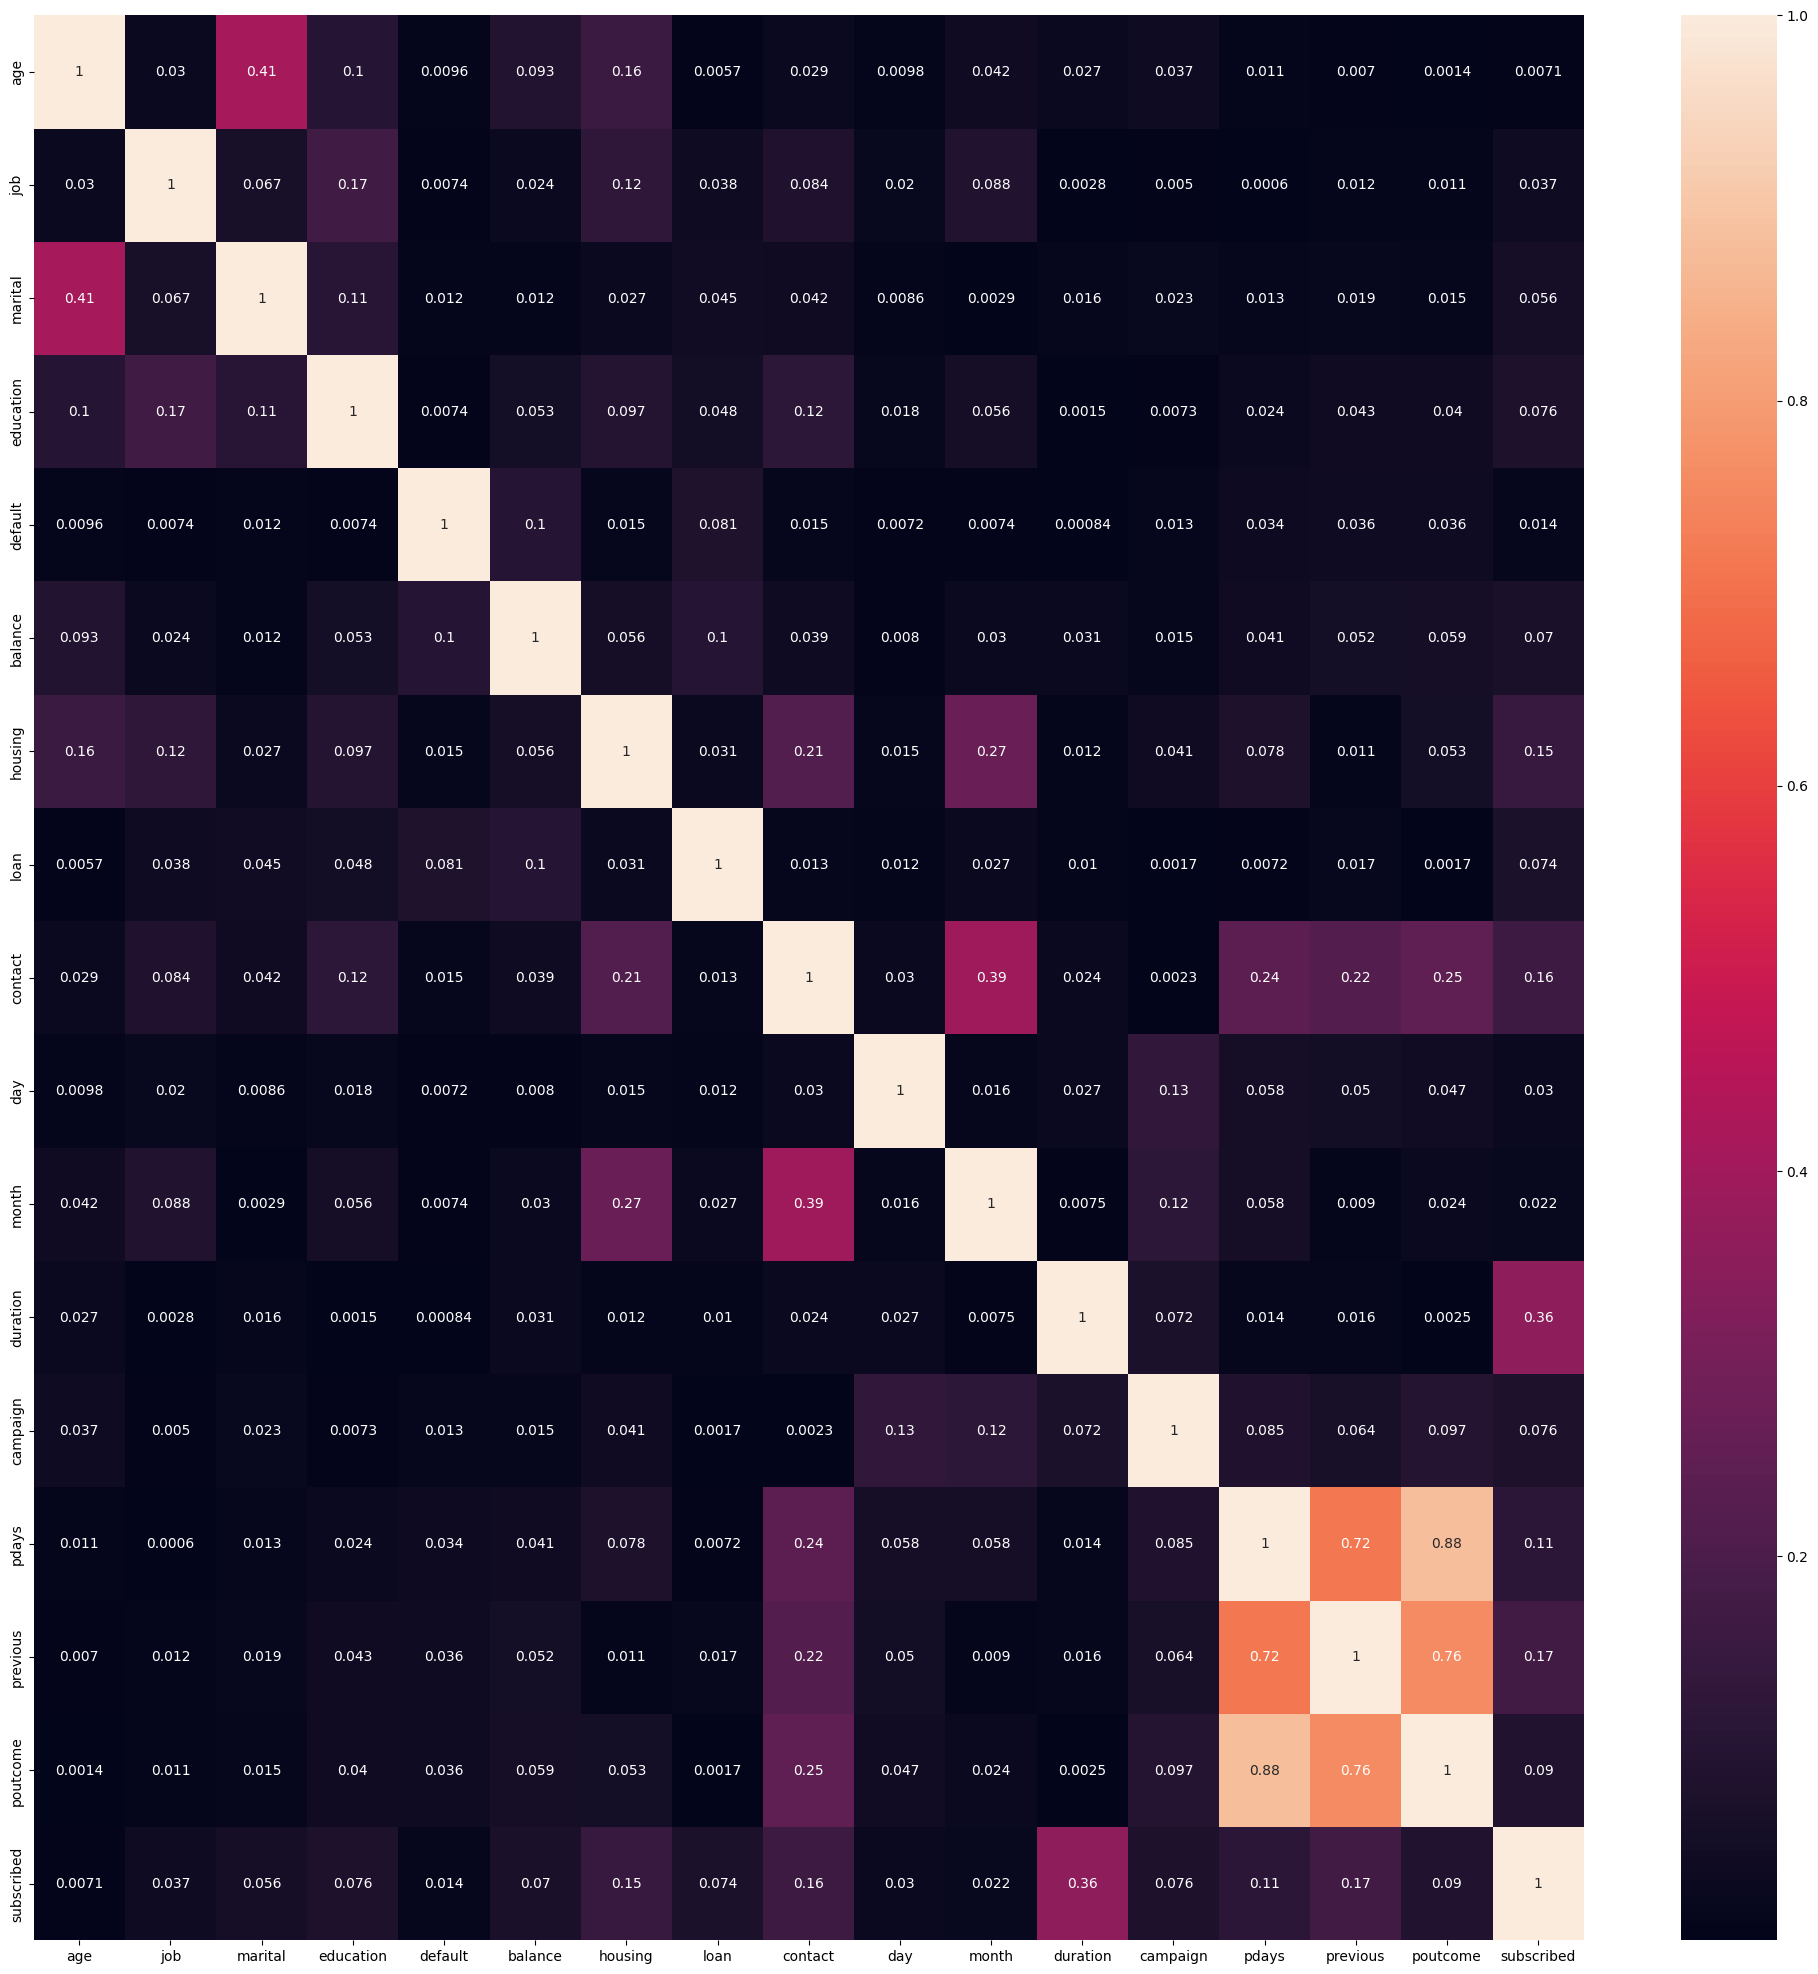

In [50]:
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr().abs(), annot = True)
plt.show()

In [51]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4,2,1,0,2968,0,0,2,20,6,30,4,-1,0,3,0
31641,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1


<Axes: xlabel='pdays', ylabel='poutcome'>

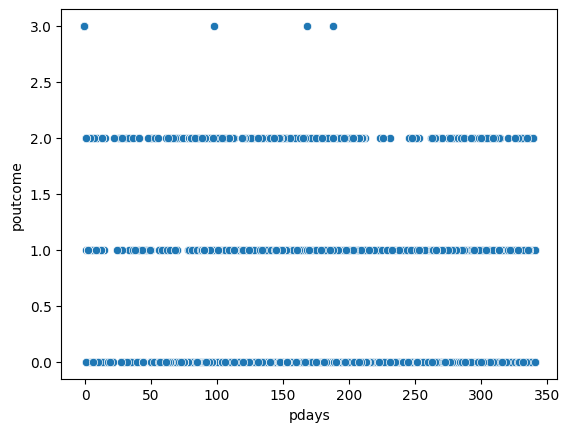

In [52]:
sns.scatterplot(x = 'pdays',y='poutcome',data = df_train)

<Axes: xlabel='previous', ylabel='poutcome'>

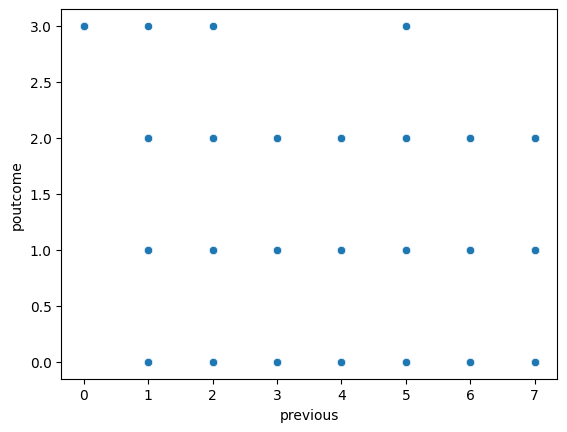

In [53]:
sns.scatterplot(x = 'previous',y='poutcome',data = df_train)

<Axes: xlabel='pdays', ylabel='previous'>

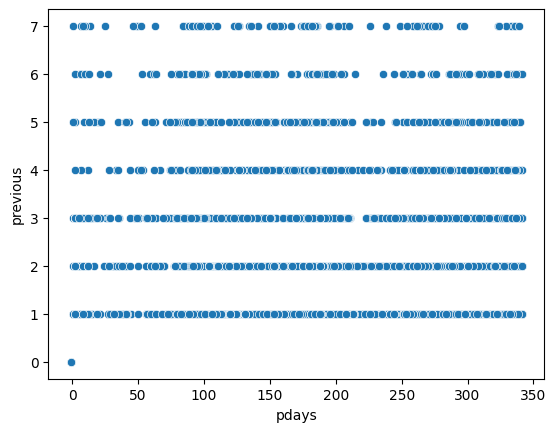

In [54]:
sns.scatterplot(x = 'pdays',y='previous',data = df_train)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
X = df_train.drop(columns = ['subscribed'],axis = 1)
y = df_train.subscribed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = pd.DataFrame()
vif['Score'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Feature'] = X.columns
vif

,Score,Feature
0,1.273395,age
1,1.049301,job
2,1.227901,marital
3,1.065701,education
4,1.017623,default
5,1.043956,balance
6,1.179539,housing
7,1.022931,loan
8,1.324334,contact
9,1.026569,day


In [60]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features = SelectKBest(score_func = f_classif, k = 16)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_features = pd.DataFrame(X.columns)
features = pd.concat([df_scores,df_features],axis = 1)
features.columns = ['Score','Feature']
print(features.nlargest(16,'Score'))

          Score    Feature
11  4101.088856   duration
14   868.357628   previous
8    719.541577    contact
6    608.630016    housing
13   371.156340      pdays
15   229.865612   poutcome
12   161.991820   campaign
3    161.616027  education
7    156.488383       loan
5    140.412881    balance
2     89.763512    marital
1     38.887830        job
9     25.361079        day
10    14.131807      month
4      5.906658    default
0      1.415721        age


In [61]:
new_X = df_train.drop(columns = ['default','age'],axis = 1)

In [62]:
new_X.head()

,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,1,3,1933,0,0,1,19,9,44,2,-1,0,3,0
1,11,1,1,3,0,0,0,20,5,91,2,-1,0,3,0
2,7,1,1,891,1,0,0,18,5,240,1,-1,0,3,0
3,4,0,2,3287,0,0,0,22,6,867,1,84,3,2,1
4,9,1,1,119,1,0,0,4,3,380,1,-1,0,3,0


In [66]:
X_scaled = scaler.fit_transform(new_X)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAcc = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Best Accuracy is ",maxAcc,"at random state ",maxRS)

Best Accuracy is  1.0 at random state  1


In [68]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30,random_state = maxRS)

In [69]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# Train models
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
knc = KNeighborsClassifier()

In [71]:
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [72]:
etc.fit(x_train,y_train)
pred_etc = etc.predict(x_test)
print(accuracy_score(y_test,pred_etc))
print(confusion_matrix(y_test,pred_etc))
print(classification_report(y_test,pred_etc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [73]:
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [74]:
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [75]:
gbc.fit(x_train,y_train)
pred_gbc = gbc.predict(x_test)
print(accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [76]:
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)
print(accuracy_score(y_test,pred_abc))
print(confusion_matrix(y_test,pred_abc))
print(classification_report(y_test,pred_abc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [77]:
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)
print(accuracy_score(y_test,pred_knc))
print(confusion_matrix(y_test,pred_knc))
print(classification_report(y_test,pred_knc))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = knc.predict(x_test)
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

1.0
[[7597    0]
 [   0  857]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7597
           1       1.00      1.00      1.00       857

    accuracy                           1.00      8454
   macro avg       1.00      1.00      1.00      8454
weighted avg       1.00      1.00      1.00      8454



In [79]:
score1 = cross_val_score(rfc,X_scaled,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_rfc) - score1.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [80]:
score2 = cross_val_score(etc,X_scaled,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_etc) - score2.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [81]:
score3 = cross_val_score(dtc,X_scaled,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_dtc) - score3.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [82]:
score4 = cross_val_score(svc,X_scaled,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_svc) - score4.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [83]:
score5 = cross_val_score(gbc,X_scaled,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_gbc) - score5.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [84]:
score6 = cross_val_score(abc,X_scaled,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_abc) - score6.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [85]:
score7 = cross_val_score(knc,X_scaled,y)
print(score7)
print(score7.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_knc) - score7.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


In [86]:
score8 = cross_val_score(lr,X_scaled,y)
print(score8)
print(score8.mean())
print("Difference between accuracy score and cross val score is :" , accuracy_score(y_test,pred_lr) - score8.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between accuracy score and cross val score is : 0.0


# Pick any model. Good news

In [87]:
help(LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [92]:
final_model = LogisticRegression()
final_model.fit(x_train,y_train)

LogisticRegression()

In [100]:
import joblib
joblib.dump(final_model,'Bank Marketing Project.pkl')

['Bank Marketing Project.pkl']

In [103]:
model = joblib.load('Bank Marketing Project.pkl')